# Restaurant Sales report
**EDA and Analysis Ideas for restaurant business**

# File Description:

#### File Format: CSV
#### Columns: This dataset includes columns such as order_id, date, item_name, item_type, item_price, quantity, transaction_amount, transaction_type, received_by, and time_of_sale.
#### Data Size: This file contains 1000 rows and 10 columns.
#### Data Structure: The dataset is organized as a single CSV file, providing information on transactions at a local restaurant.
#### Data Cleaning and Preprocessing: The data has been carefully reviewed and cleaned to address duplicates and missing values, ensuring data quality for analysis.
#### Date of Last Update: The dataset was last updated on March 31, 2023.
#### Special Notes: Please note that the 'transaction_amount' column represents the total transaction amount, derived from the multiplication of 'item_price' and 'quantity' for each item in the order.
#### Data Source: This data was collected from a local restaurant situated near my home and is made available for analysis and educational purposes.

## Data Description:
This dataset captures sales transactions from a local restaurant near my home. It includes details such as the order ID, date of the transaction, item names (representing various food and beverage items), item types (categorized as Fast-food or Beverages), item prices, quantities ordered, transaction amounts, transaction types (cash, online, or others), the gender of the staff member who received the order, and the time of the sale (Morning, Evening, Afternoon, Night, Midnight). The dataset offers a valuable snapshot of the restaurant's daily operations and customer behavior.

### Columns:

    order_id: a unique identifier for each order.
    date: date of the transaction.
    item_name: name of the food.
    item_type: category of item (Fastfood or Beverages).
    item_price: price of the item for 1 quantity.
    Quantity: how much quantity the customer orders.
    transaction_amount: the total amount paid by customers.
    transaction_type: payment method (cash, online, others).
    received_by: gender of the person handling the transaction.
    time_of_sale: different times of the day (Morning, Evening, Afternoon, Night, Midnight).

# EXPLORATORY DATA ANALYSIS

## STEP 1: import libraries and read the data

In [13]:
import numpy as np
import pandas as pd

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [15]:
df=pd.read_csv('Balaji Fast Food Sales.csv')
df.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening


## STEP 2: Understanding the data

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            1000 non-null   int64 
 1   date                1000 non-null   object
 2   item_name           1000 non-null   object
 3   item_type           1000 non-null   object
 4   item_price          1000 non-null   int64 
 5   quantity            1000 non-null   int64 
 6   transaction_amount  1000 non-null   int64 
 7   transaction_type    893 non-null    object
 8   received_by         1000 non-null   object
 9   time_of_sale        1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


In [18]:
df.shape

(1000, 10)

In [19]:
df.size

10000

### INFERENCE:

* No. of rows= 1000
* No. of columns= 10
* No.of values= 10000
* Only the column 'transaction_type' has null values
* There are 6 columns with object datatype and  4 columns with int datatype.

## STEP 3: Check for duplicate rows

In [22]:
df[df.duplicated()]

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale


### INFERENCE:
* There is no duplicate rows in this dataset.

## STEP 4: Check all datatypes of the column and change if any anomalies

In [25]:
col=df.columns.to_list()
col

['order_id',
 'date',
 'item_name',
 'item_type',
 'item_price',
 'quantity',
 'transaction_amount',
 'transaction_type',
 'received_by',
 'time_of_sale']

In [26]:
for i in col:
    print(i)
    print(df[i].unique())
    print()
    print('********')

order_id
[   1    2    3    4    5    6    7    8    9   10   11   12   13   14
   15   16   17   18   19   20   21   22   23   24   25   26   27   28
   29   30   31   32   33   34   35   36   37   38   39   40   41   42
   43   44   45   46   47   48   49   50   51   52   53   54   55   56
   57   58   59   60   61   62   63   64   65   66   67   68   69   70
   71   72   73   74   75   76   77   78   79   80   81   82   83   84
   85   86   87   88   89   90   91   92   93   94   95   96   97   98
   99  100  101  102  103  104  105  106  107  108  109  110  111  112
  113  114  115  116  117  118  119  120  121  122  123  124  125  126
  127  128  129  130  131  132  133  134  135  136  137  138  139  140
  141  142  143  144  145  146  147  148  149  150  151  152  153  154
  155  156  157  158  159  160  161  162  163  164  165  166  167  168
  169  170  171  172  173  174  175  176  177  178  179  180  181  182
  183  184  185  186  187  188  189  190  191  192  193  194  195  1

In [27]:
df['date']=df['date'].str.replace('-','/')
df['date']

0      07/03/2022
1       8/23/2022
2      11/20/2022
3      02/03/2023
4      10/02/2022
          ...    
995     3/19/2023
996     9/20/2022
997     1/26/2023
998     8/27/2022
999     5/29/2022
Name: date, Length: 1000, dtype: object

In [28]:
df.dtypes

order_id               int64
date                  object
item_name             object
item_type             object
item_price             int64
quantity               int64
transaction_amount     int64
transaction_type      object
received_by           object
time_of_sale          object
dtype: object

In [29]:
df['date']=pd.to_datetime(df['date'])
df['date']

0     2022-07-03
1     2022-08-23
2     2022-11-20
3     2023-02-03
4     2022-10-02
         ...    
995   2023-03-19
996   2022-09-20
997   2023-01-26
998   2022-08-27
999   2022-05-29
Name: date, Length: 1000, dtype: datetime64[ns]

In [30]:
df.dtypes

order_id                       int64
date                  datetime64[ns]
item_name                     object
item_type                     object
item_price                     int64
quantity                       int64
transaction_amount             int64
transaction_type              object
received_by                   object
time_of_sale                  object
dtype: object

### INFERENCE:
* Only the 'date' column has the anomaly, so all the dates are replace to one alignment by replacing '/' with '-'.
* After the changing, the datatype is changed from object to datetime datatype

### STEP 5: Separate num and cat variables

In [33]:
col=df.columns.to_list()

In [34]:
df.select_dtypes(include=np.number).columns.to_list()

['order_id', 'item_price', 'quantity', 'transaction_amount']

In [35]:
num=df.select_dtypes(include=np.number).columns.to_list()
print('Numeric columns:',num)

Numeric columns: ['order_id', 'item_price', 'quantity', 'transaction_amount']


In [36]:
cat=df.select_dtypes(exclude=np.number).columns.to_list()
print('Categorical column:', cat)

Categorical column: ['date', 'item_name', 'item_type', 'transaction_type', 'received_by', 'time_of_sale']


### STEP 6: Statistic analysis:

#### Numeric variable:

In [39]:
for i in num:
    print(f'Mean value of column {i} is',df[i].mean())
    print('******')

Mean value of column order_id is 500.5
******
Mean value of column item_price is 33.315
******
Mean value of column quantity is 8.162
******
Mean value of column transaction_amount is 275.23
******


In [40]:
for i in num:
    print(f'Median value of column {i} is', df[i].median())
    print('*****')

Median value of column order_id is 500.5
*****
Median value of column item_price is 25.0
*****
Median value of column quantity is 8.0
*****
Median value of column transaction_amount is 240.0
*****


In [41]:
for i in num:
    print(f'Mode value of column {i} is', df[i].mode())
    print('*****')

Mode value of column order_id is 0         1
1         2
2         3
3         4
4         5
       ... 
995     996
996     997
997     998
998     999
999    1000
Name: order_id, Length: 1000, dtype: int64
*****
Mode value of column item_price is 0    20
Name: item_price, dtype: int64
*****
Mode value of column quantity is 0    13
Name: quantity, dtype: int64
*****
Mode value of column transaction_amount is 0    300
Name: transaction_amount, dtype: int64
*****


### Categoric variable:

In [43]:
for i in cat:
    print(f'Mode value of column {i} is', df[i].mode())
    print('*****')

Mode value of column date is 0   2022-05-09
1   2022-08-31
2   2022-10-11
Name: date, dtype: datetime64[ns]
*****
Mode value of column item_name is 0    Cold coffee
Name: item_name, dtype: object
*****
Mode value of column item_type is 0    Fastfood
Name: item_type, dtype: object
*****
Mode value of column transaction_type is 0    Cash
Name: transaction_type, dtype: object
*****
Mode value of column received_by is 0    Mr.
Name: received_by, dtype: object
*****
Mode value of column time_of_sale is 0    Afternoon
1        Night
Name: time_of_sale, dtype: object
*****


## Measures of dispersion:

In [45]:
for i in num:
    print(f'Range value of column {i} is', df[i].max()-df[i].min())
    print('*****')

Range value of column order_id is 999
*****
Range value of column item_price is 40
*****
Range value of column quantity is 14
*****
Range value of column transaction_amount is 880
*****


In [46]:
for i in num:
    print(f'Variance value of column {i} is', df[i].var())
    print('*****')

Variance value of column order_id is 83416.66666666667
*****
Variance value of column item_price is 222.65843343343138
*****
Variance value of column quantity is 19.475231231231273
*****
Variance value of column transaction_amount is 41780.57767767783
*****


In [47]:
for i in num:
    print(f'Standard deviation value of column {i} is', df[i].std())
    print('*****')

Standard deviation value of column order_id is 288.8194360957494
*****
Standard deviation value of column item_price is 14.921743645882387
*****
Standard deviation value of column quantity is 4.413075031226104
*****
Standard deviation value of column transaction_amount is 204.4029786418922
*****


In [48]:
for i in num:
    print(f'IQR value of column {i} is', df[i].quantile(0.75)- df[i].quantile(0.25))
    print('*****')

IQR value of column order_id is 499.5
*****
IQR value of column item_price is 30.0
*****
IQR value of column quantity is 8.0
*****
IQR value of column transaction_amount is 240.0
*****


### Measure of shape

In [50]:
for i in num:
    print(f'Skew value of column {i} is', df[i].skew())
    print('*****')

Skew value of column order_id is 0.0
*****
Skew value of column item_price is 0.6250044803515558
*****
Skew value of column quantity is -0.05129947454908782
*****
Skew value of column transaction_amount is 1.052643178230624
*****


#### Kurtosis:

In [52]:
for i in num:
    print(f'Kurtosis value of column {i} is', df[i].kurt())
    print('*****')

Kurtosis value of column order_id is -1.2
*****
Kurtosis value of column item_price is -1.173262217524134
*****
Kurtosis value of column quantity is -1.2416861155903576
*****
Kurtosis value of column transaction_amount is 0.6554065709917558
*****


### INFERENCE:
* The dataset is platykurtic since the kurtosis value is < 3

In [54]:
for i in cat:
    print(df[i].value_counts(normalize= True* 100))
    print('*****')

date
2022-10-11    0.008
2022-05-09    0.008
2022-08-31    0.008
2023-03-19    0.007
2023-02-03    0.007
              ...  
2022-06-12    0.001
2022-04-15    0.001
2022-05-17    0.001
2022-07-23    0.001
2022-06-14    0.001
Name: proportion, Length: 348, dtype: float64
*****
item_name
Cold coffee        0.161
Sugarcane juice    0.153
Panipuri           0.150
Frankie            0.139
Aalopuri           0.134
Vadapav            0.134
Sandwich           0.129
Name: proportion, dtype: float64
*****
item_type
Fastfood     0.686
Beverages    0.314
Name: proportion, dtype: float64
*****
transaction_type
Cash      0.533035
Online    0.466965
Name: proportion, dtype: float64
*****
received_by
Mr.     0.512
Mrs.    0.488
Name: proportion, dtype: float64
*****
time_of_sale
Night        0.205
Afternoon    0.205
Evening      0.201
Midnight     0.199
Morning      0.190
Name: proportion, dtype: float64
*****


### COVARIANCE:

In [56]:
df[num].cov()

,order_id,item_price,quantity,transaction_amount
order_id,83416.666667,159.577077,13.185185,2595.785786
item_price,159.577077,222.658433,3.316286,1943.606156
quantity,13.185185,3.316286,19.475231,660.122863
transaction_amount,2595.785786,1943.606156,660.122863,41780.577678


### INFERENCE:
* item_price and transaction_amount has very positive covariance value.
* quantity and item_price has some positive covariance value.

## CORRELATION:

In [59]:
df[num].corr()

,order_id,item_price,quantity,transaction_amount
order_id,1.000000,0.037028,0.010345,0.043970
item_price,0.037028,1.000000,0.050361,0.637238
quantity,0.010345,0.050361,1.000000,0.731806
transaction_amount,0.043970,0.637238,0.731806,1.000000


### INFERENCE:
* quantity and transaction_amount has highly positively correlated value.
* quantity and item_price has slightly positively correlated value.

## COEFFICIENT OF VARIANCE:

In [62]:
for i in num:
    print(f'Coefficient of variance of column {i} is', (df[i].std()/df[i].mean())*100)
    print('*****')

Coefficient of variance of column order_id is 57.70618103811176
*****
Coefficient of variance of column item_price is 44.789865363597144
*****
Coefficient of variance of column quantity is 54.06854975773221
*****
Coefficient of variance of column transaction_amount is 74.26624228532216
*****


### INFERENCE:
* Level of deviation is high in transaction_amount.
* Level of deviation is medium in item_price

## DATA VISUALISATION:

* To visualise the data for a better understanding using metrics.
#### univariate numeric variable- single column analysis
* histplot=frequency bars--sns.histplot(),plt.hist()
* distplot-- frequency distribution-- sns.distplot()
* boxplot-- to check the outliers --- sns.boxplot()

#### univariate categorical variable
* plot(kind='bar'/ 'pie')
* sns.countplot()
* plt.pie()

#### Bivariate
##### Num vs num
* sns.scatterplot() -- to find relation/ effect
* plt.plot()-- to find trend

##### Num vs cat
* .groupby().plot(kind='bar'/'pie') -- to get mean
* sns.barplot()-- to get mean estimation
* sns.boxplot() -- to see outliers in each category

##### Cat vs cat
* pd.crosstab().plot(kind='bar'/'pie') -- to get frequency bar for each category
* sns.countplot(x,hue)

In [66]:
df[num]

,order_id,item_price,quantity,transaction_amount
0,1,20,13,260
1,2,20,15,300
2,3,20,1,20
3,4,25,6,150
4,5,25,8,200
...,...,...,...,...
995,996,50,10,500
996,997,60,7,420
997,998,60,13,780
998,999,20,5,100


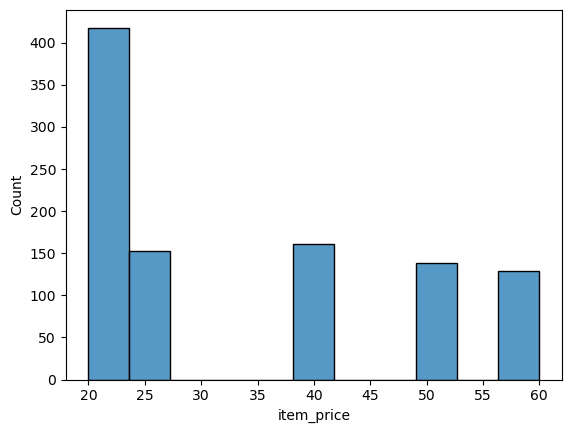

In [67]:
sns.histplot(df['item_price'])
plt.show()

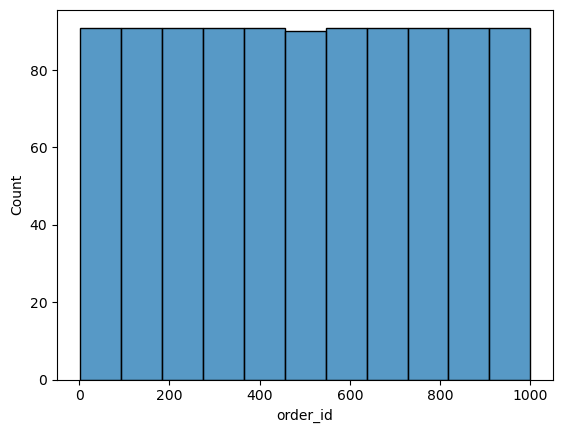

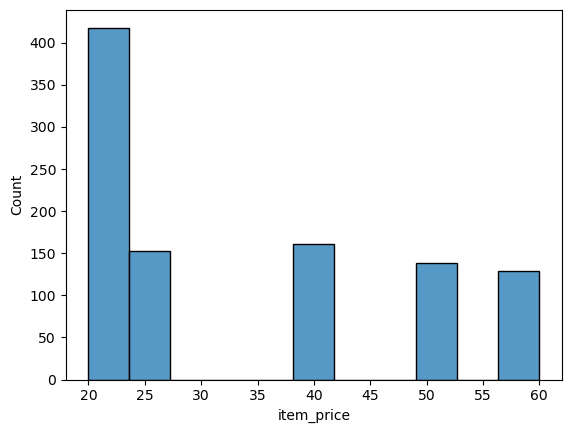

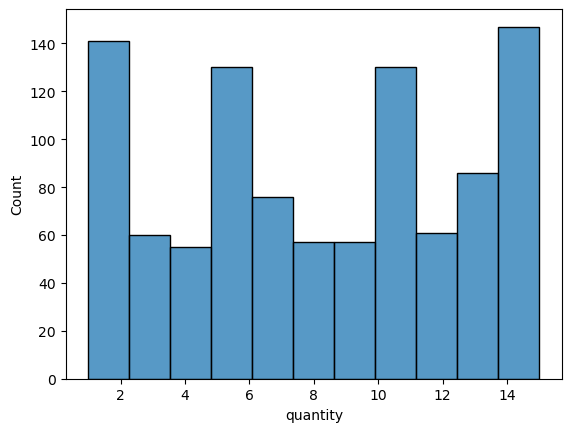

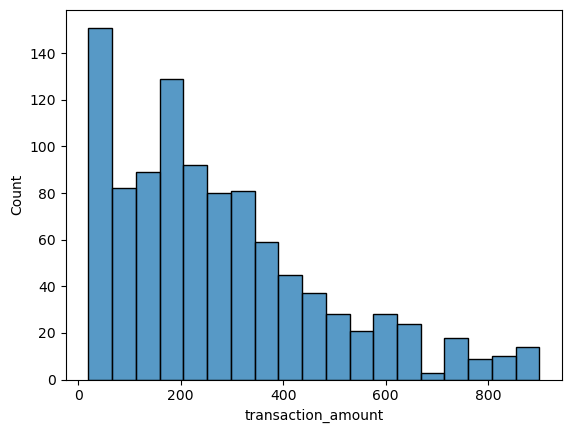

In [68]:
for i in num:
    sns.histplot(df[i])
    plt.show()

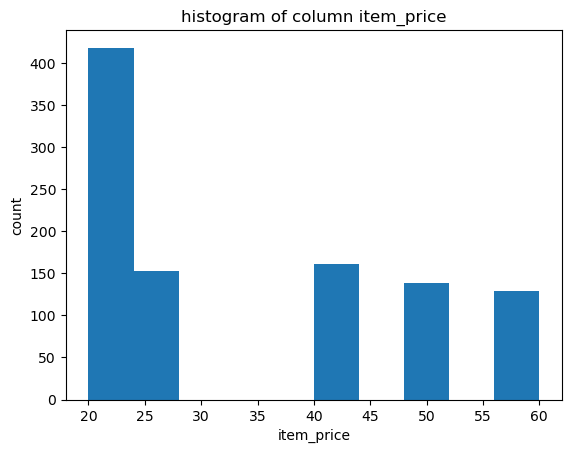

In [69]:
plt.hist(df['item_price'])
plt.xlabel('item_price')
plt.ylabel('count')
plt.title('histogram of column item_price')
plt.show()

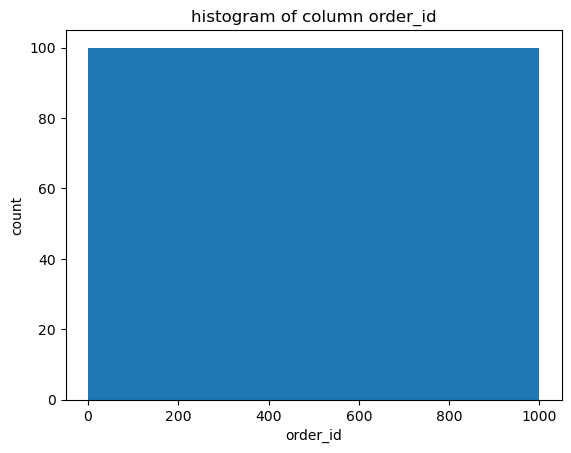

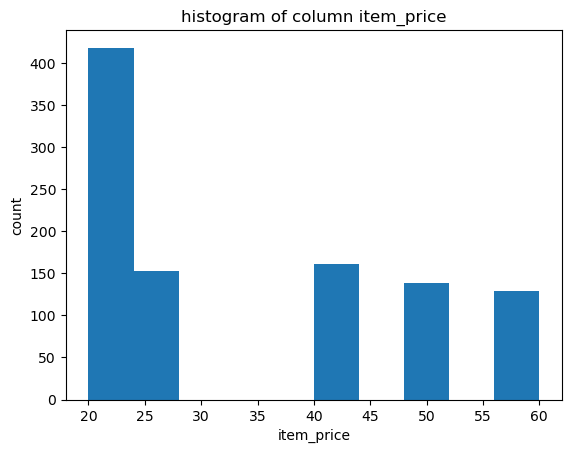

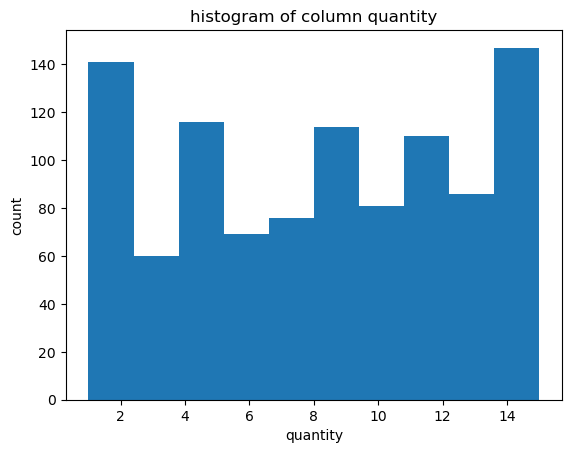

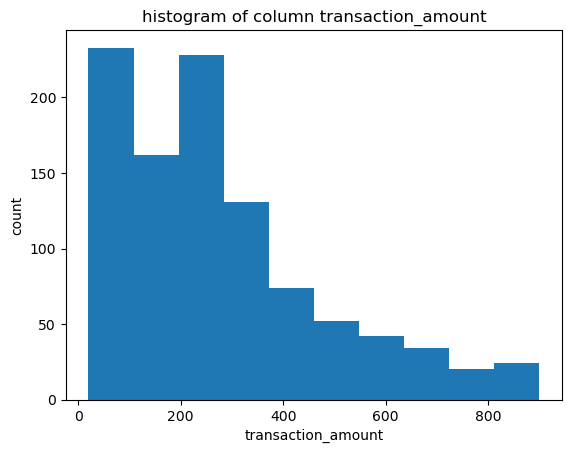

In [70]:
for i in  num:
    plt.hist(df[i])
    plt.xlabel(i)
    plt.ylabel('count')
    plt.title(f'histogram of column {i}')
    plt.show()

In [71]:
plt.rcParams['figure.figsize']=[15,8]

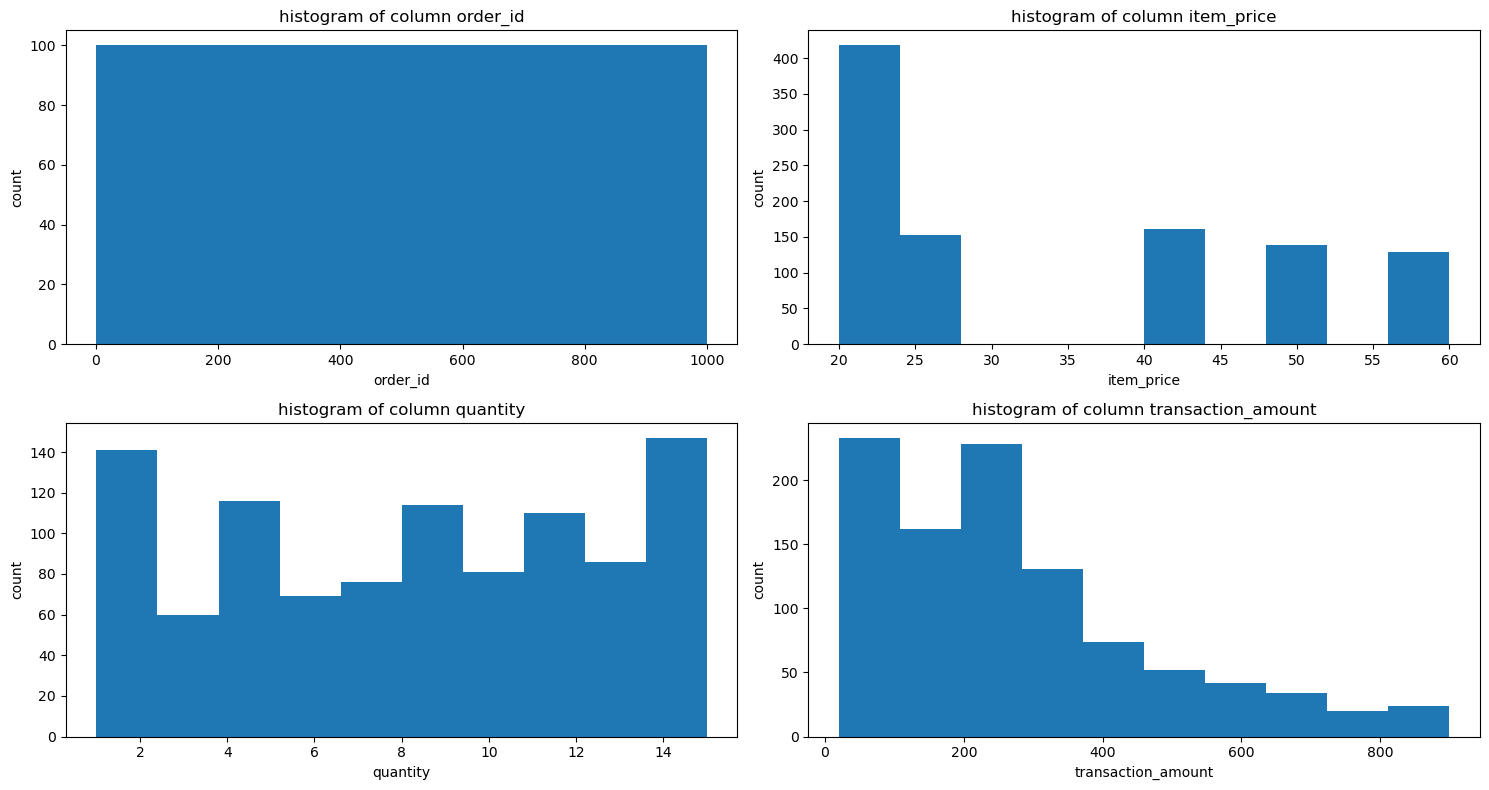

In [72]:
t=1
for i in  num:
    plt.subplot(2,2,t)
    plt.hist(df[i])
    plt.xlabel(i)
    plt.ylabel('count')
    plt.title(f'histogram of column {i}')
    t+=1
plt.tight_layout()
plt.show()

In [73]:
# frequency distribution
# sns.distplot

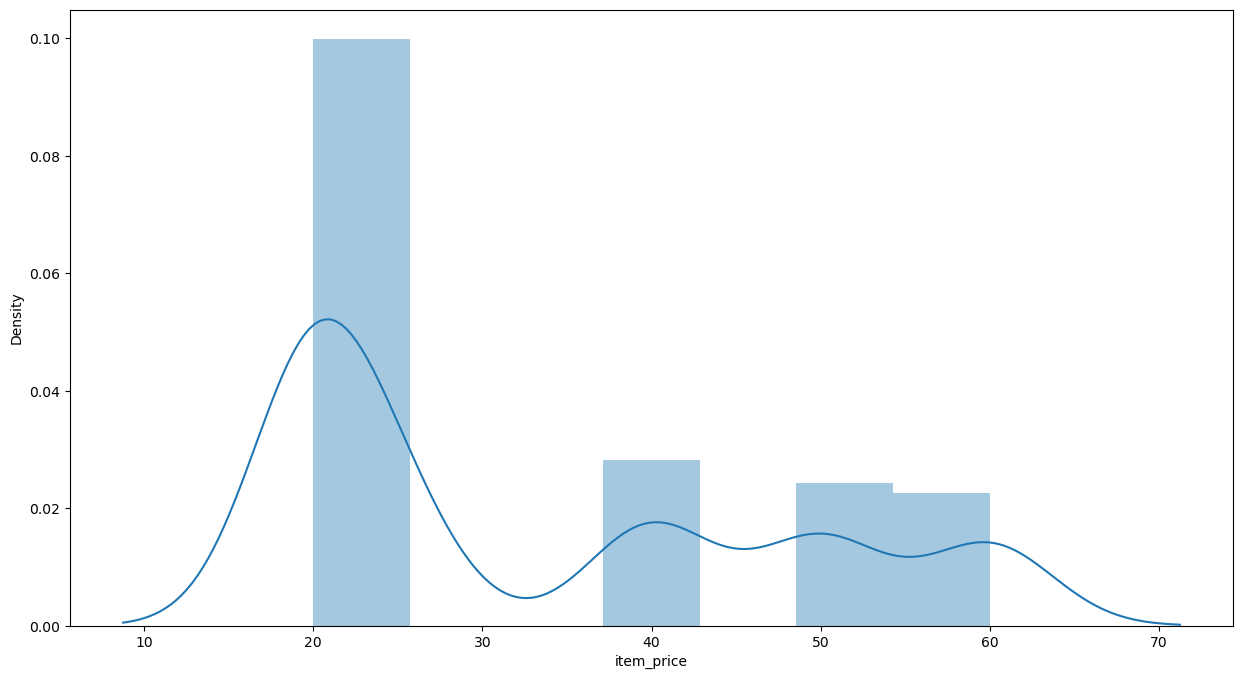

In [74]:
sns.distplot(df['item_price'])
plt.show()

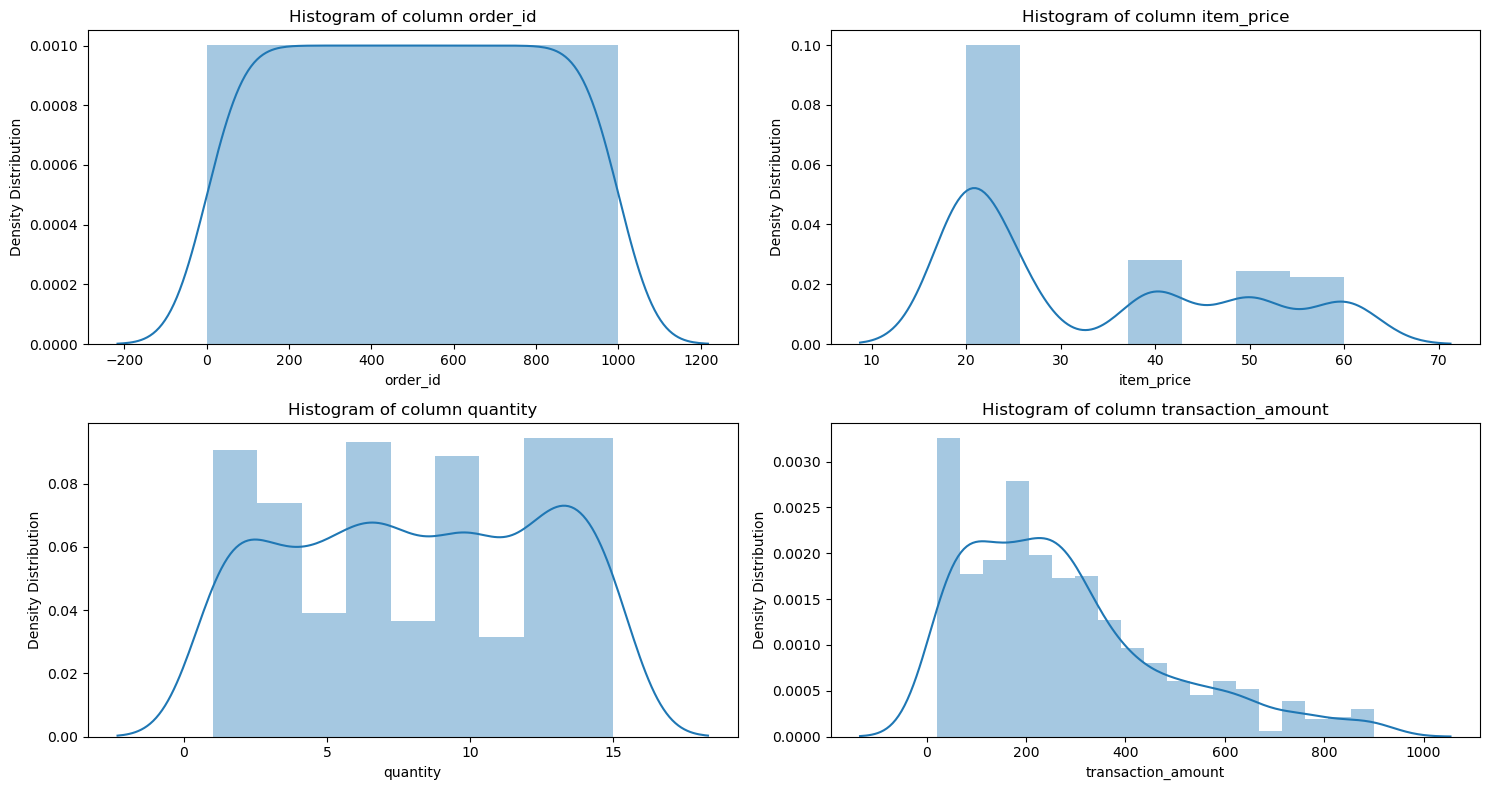

In [75]:
t=1
for i in  num:
    plt.subplot(2,2,t)
    sns.distplot(df[i])
    plt.xlabel(i)
    plt.ylabel('Density Distribution')
    plt.title(f'Histogram of column {i}')
    t+=1
plt.tight_layout()    
plt.show()

## INFERENCE:
* item_price and transaction_amount is right skewed.

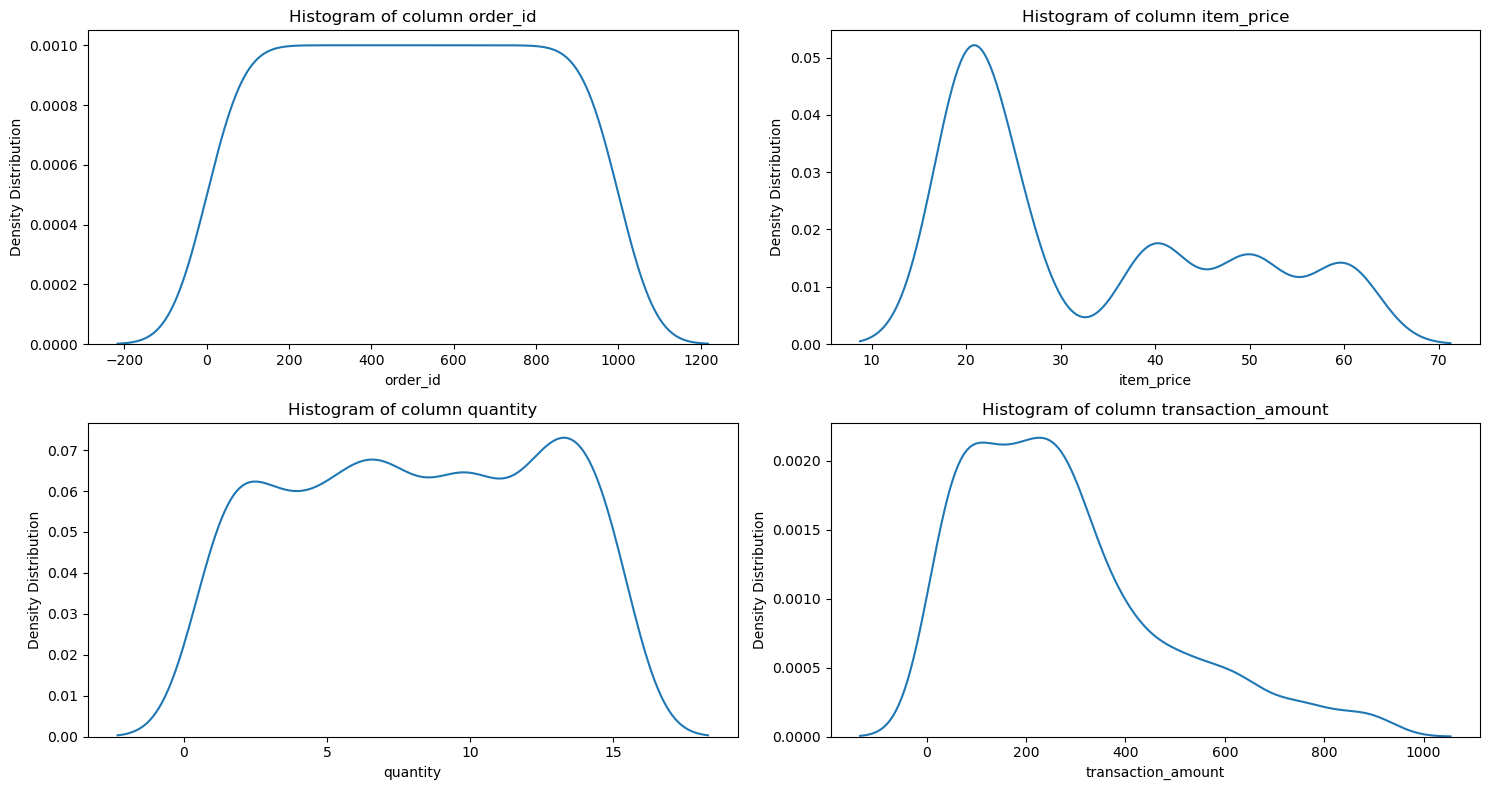

In [77]:
t=1
for i in  num:
    plt.subplot(2,2,t)
    sns.distplot(df[i],hist=False)
    plt.xlabel(i)
    plt.ylabel('Density Distribution')
    plt.title(f'Histogram of column {i}')
    t+=1
plt.tight_layout()    
plt.show()

#### to see any outliers we use boxplot

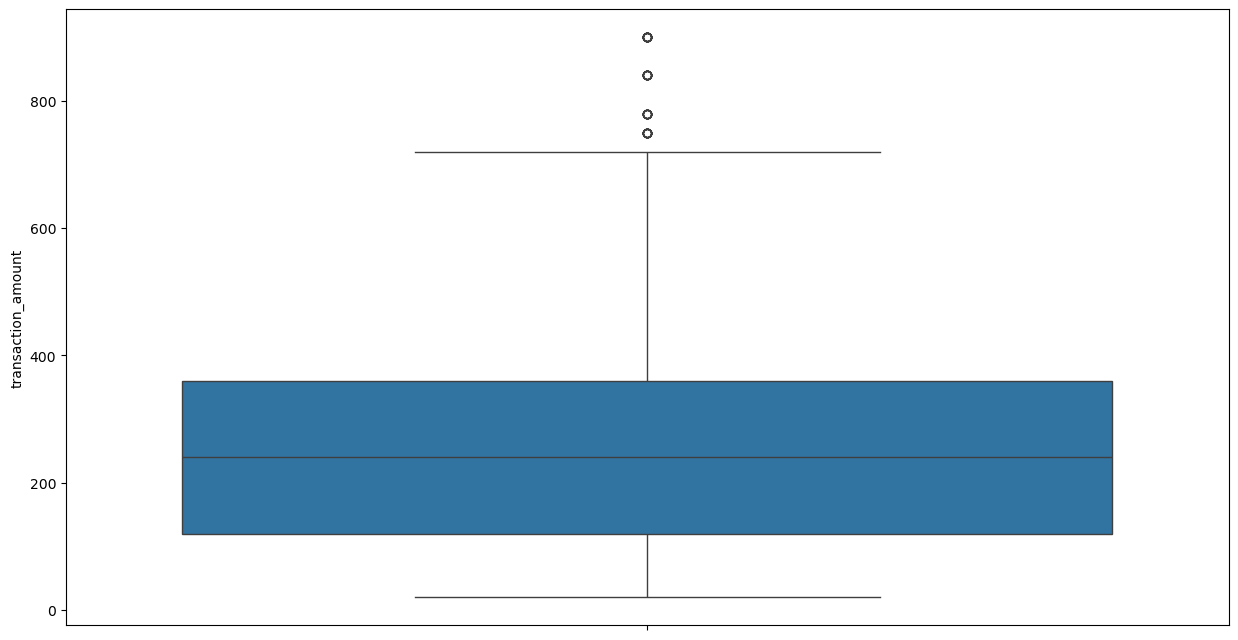

In [79]:
sns.boxplot(df['transaction_amount'])
plt.show()

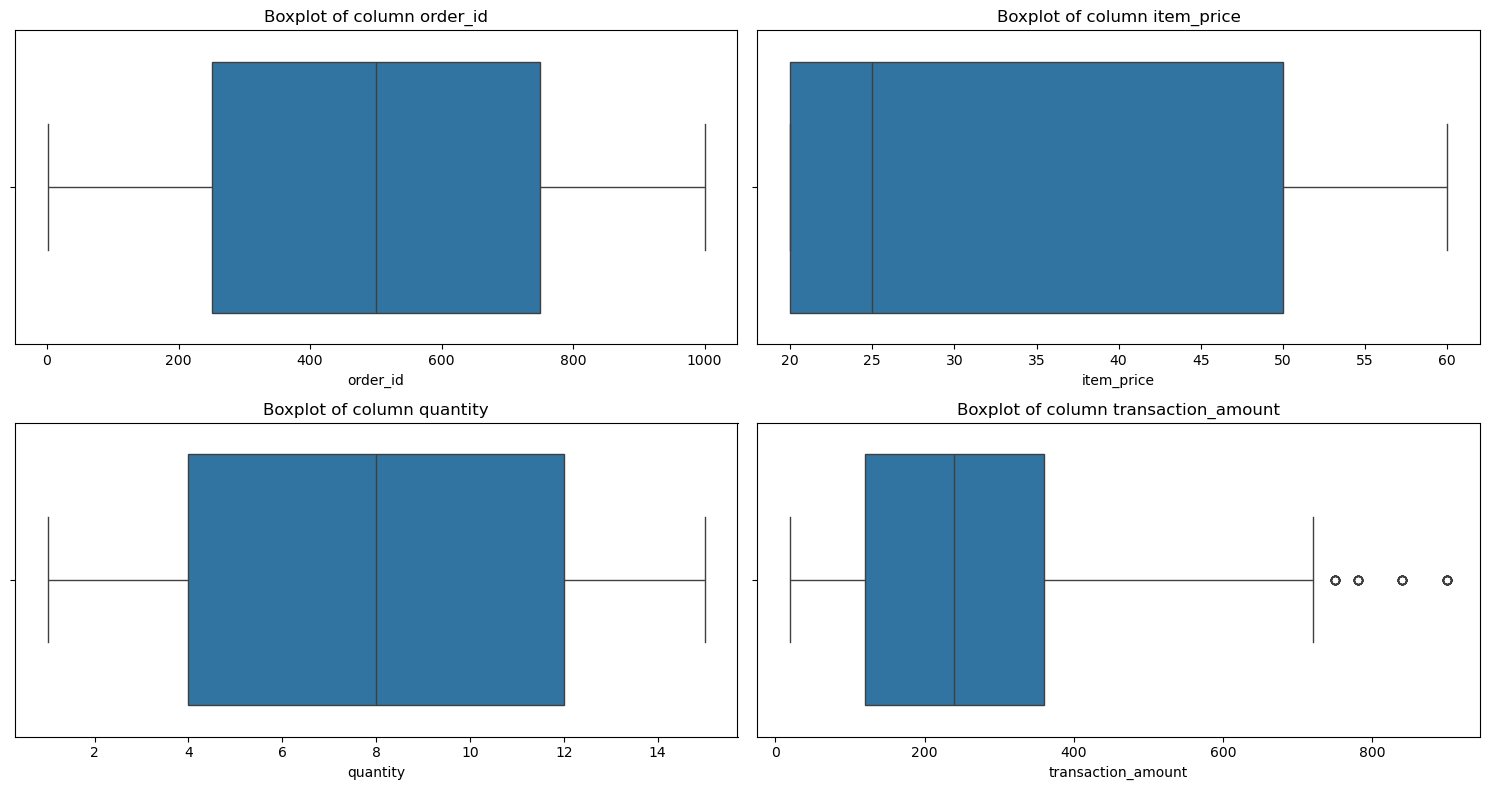

In [80]:
t=1
for i in  num:
    plt.subplot(2,2,t)
    sns.boxplot(x=df[i])
    plt.xlabel(i)
    plt.title(f'Boxplot of column {i}')
    t+=1
plt.tight_layout()    
plt.show()

### univariate- categorical column

In [82]:
cat

['date',
 'item_name',
 'item_type',
 'transaction_type',
 'received_by',
 'time_of_sale']

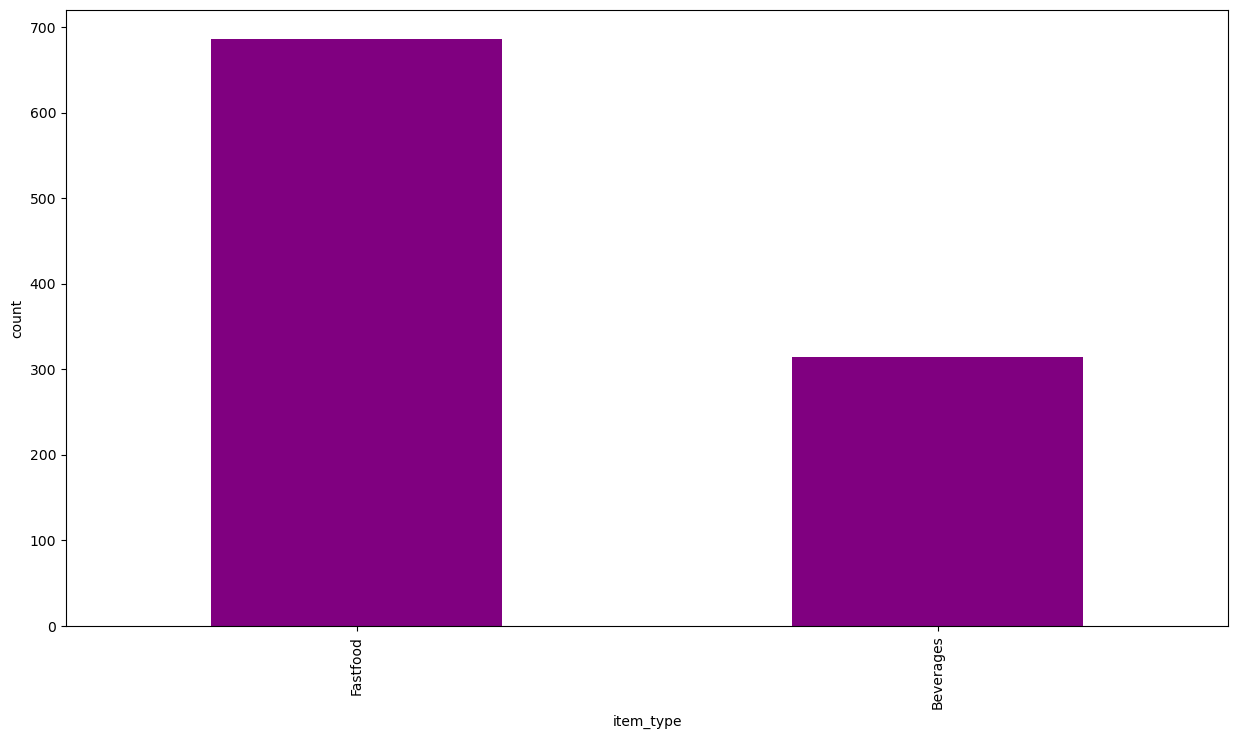

In [83]:
df['item_type'].value_counts().plot(kind='bar',color='purple')
plt.ylabel('count')
plt.show()

In [84]:
df['item_type'].value_counts()

item_type
Fastfood     686
Beverages    314
Name: count, dtype: int64

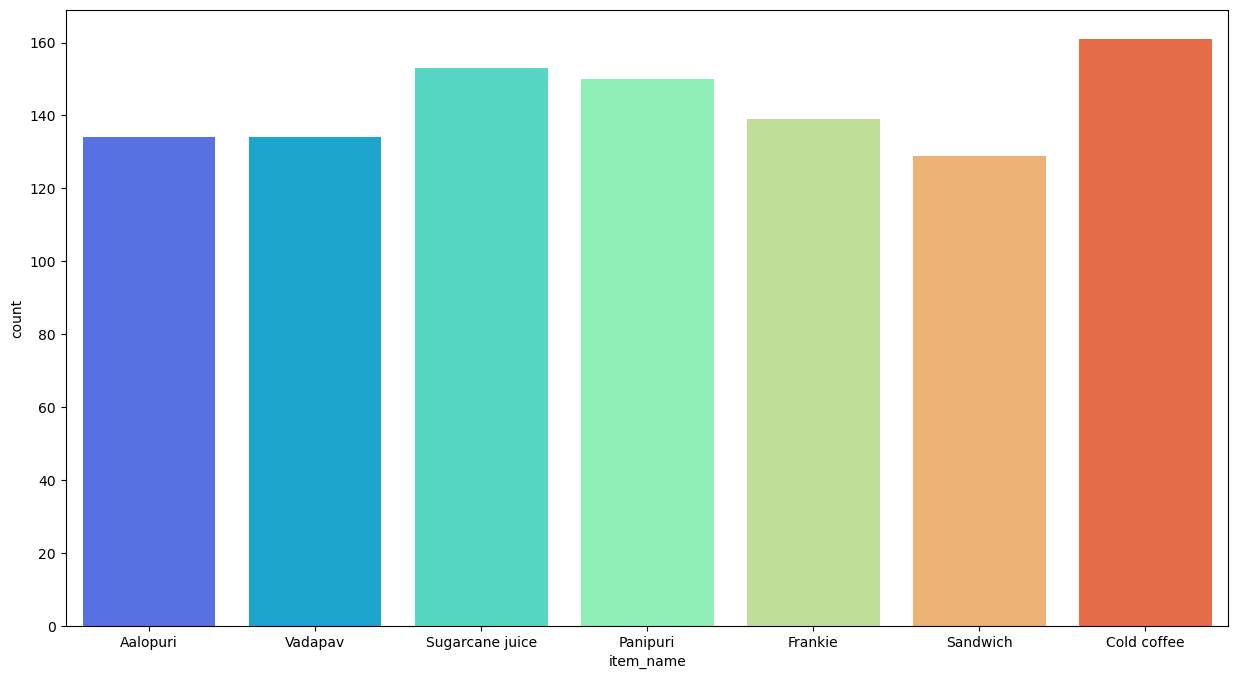

In [85]:
sns.countplot(x=df['item_name'],palette='rainbow')
plt.show()

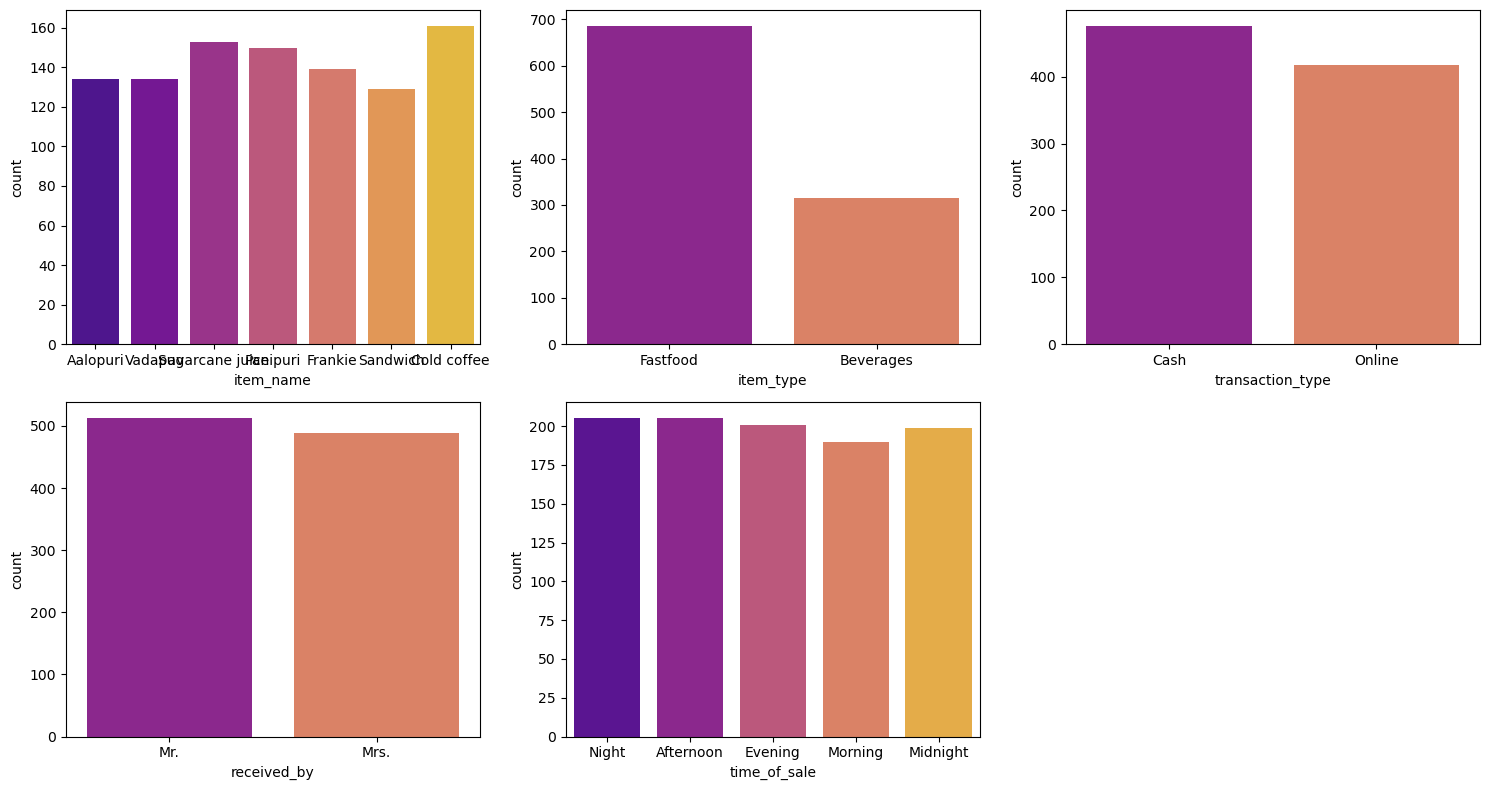

In [86]:
t=1
for i in cat:
    if i !='date':
        plt.subplot(2,3,t)
        sns.countplot(x=df[i],palette='plasma')
        t+=1
plt.tight_layout()
plt.show()

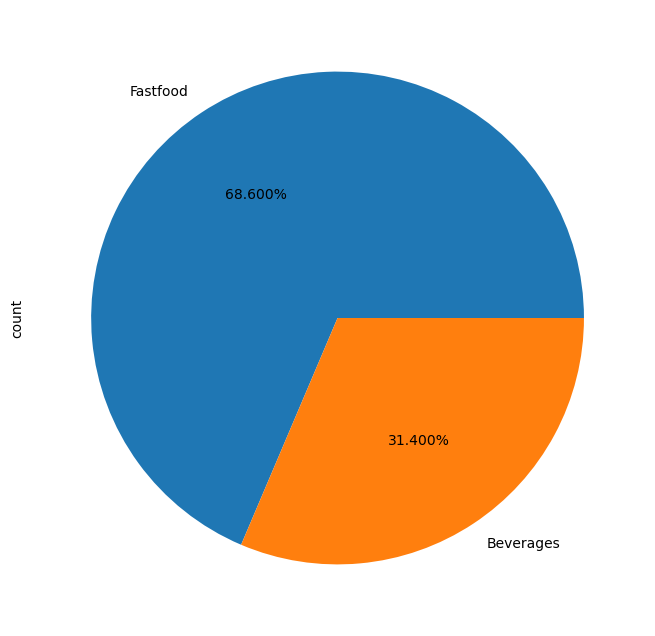

In [87]:
df['item_type'].value_counts().plot(kind='pie',autopct='%.3f%%')
plt.show()

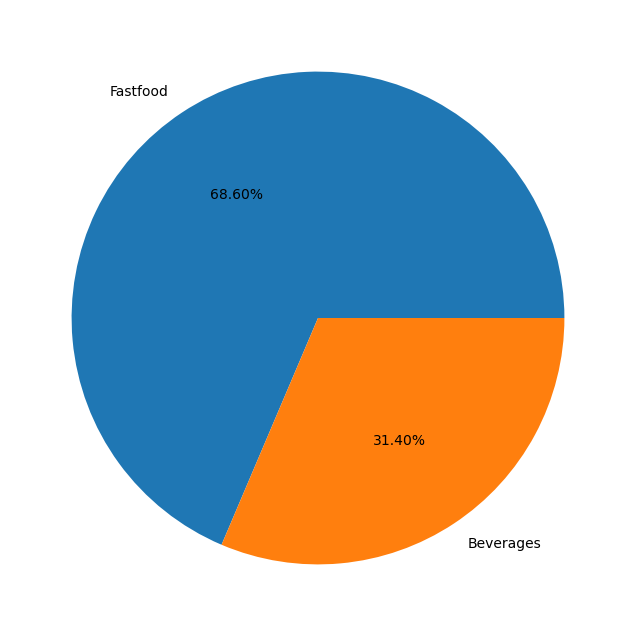

In [88]:
plt.pie(x=df['item_type'].value_counts(),labels=df['item_type'].value_counts().index,autopct='%.2f%%')
plt.show()

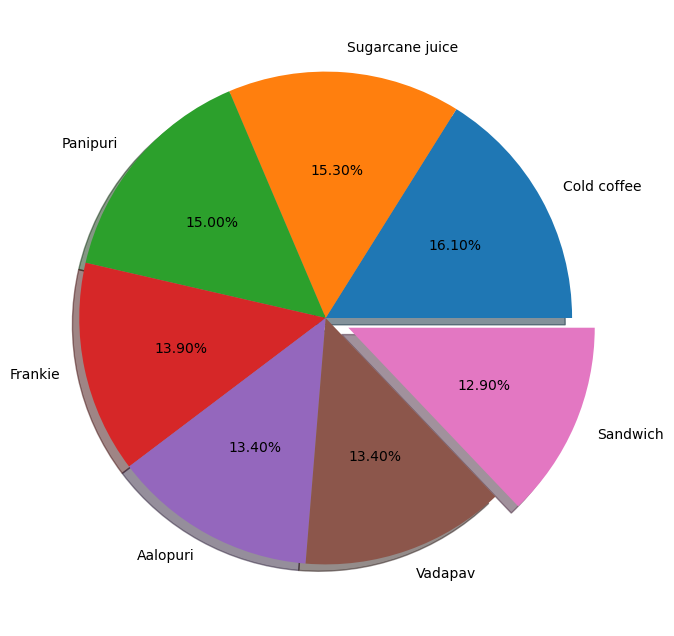

In [89]:
plt.pie(x=df['item_name'].value_counts(),labels=df['item_name'].value_counts().index,autopct='%.2f%%',
       shadow= True, explode=[0,0,0,0,0,0,0.1])
plt.show()

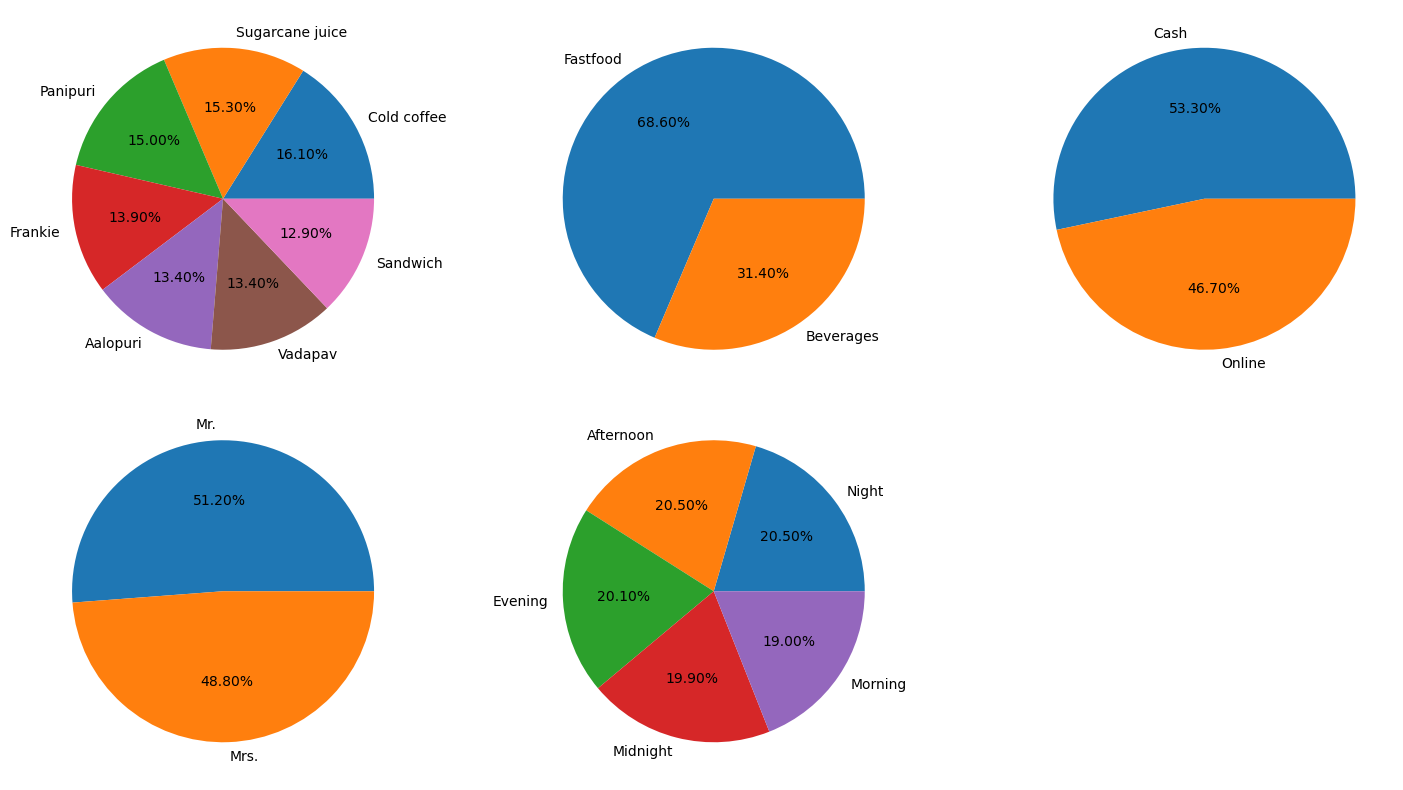

In [90]:
t=1
for i in cat:
    if i !='date':
        plt.subplot(2,3,t)
        plt.pie(x=df[i].value_counts(),labels=df[i].value_counts().index,autopct='%.2f%%')
        t+=1
plt.tight_layout()
plt.show()

### BIVARIATE:

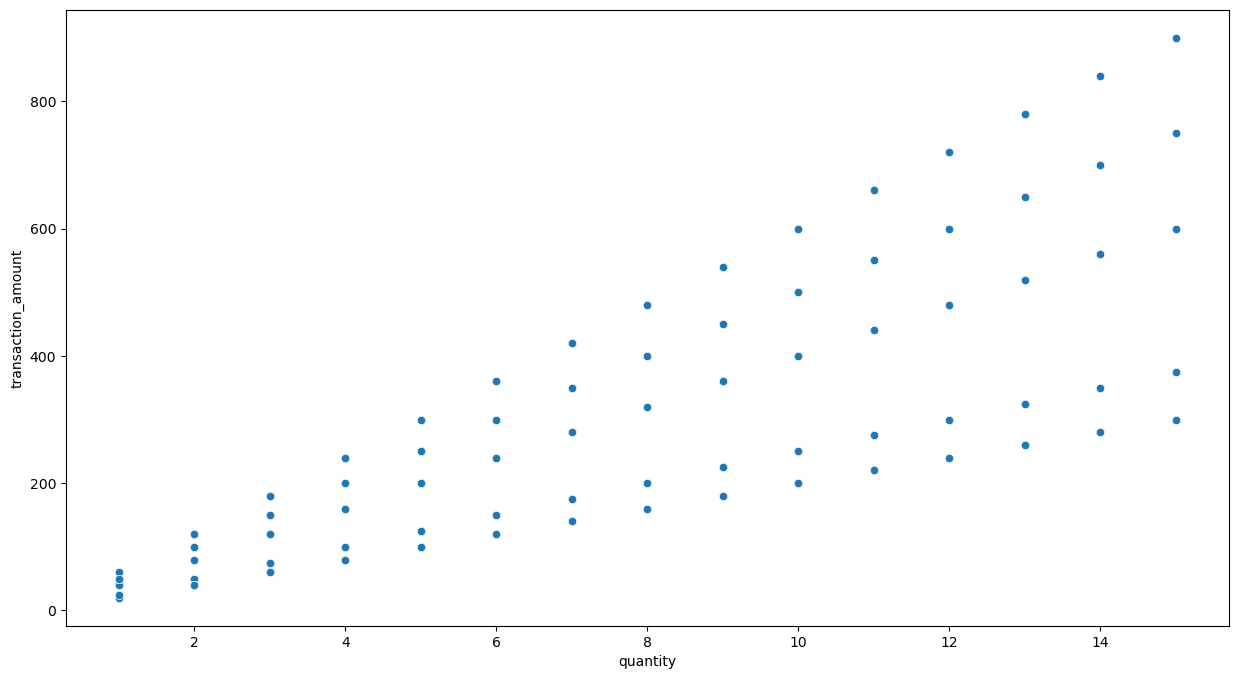

In [92]:
sns.scatterplot(x=df['quantity'],y=df['transaction_amount'])
plt.show()

## INFERENCE:
* As the quantity increases, transaction amount also increases.

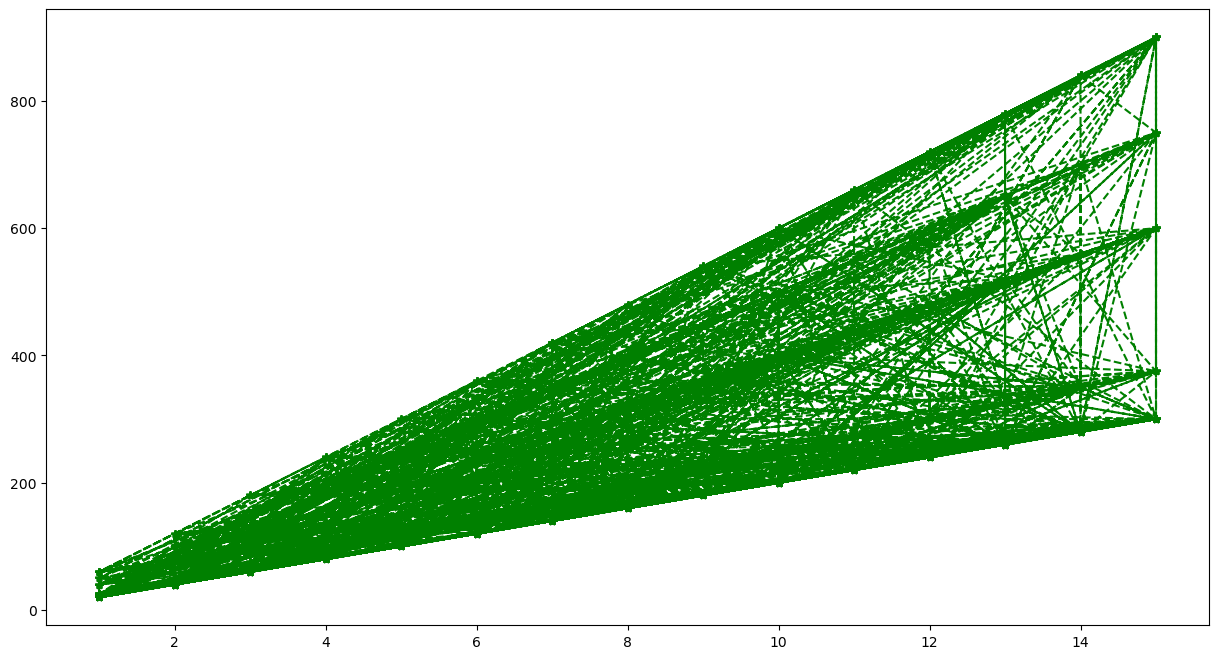

In [94]:
plt.plot(df['quantity'],df['transaction_amount'],'g*',linestyle='--')
plt.show()

In [95]:
num

['order_id', 'item_price', 'quantity', 'transaction_amount']

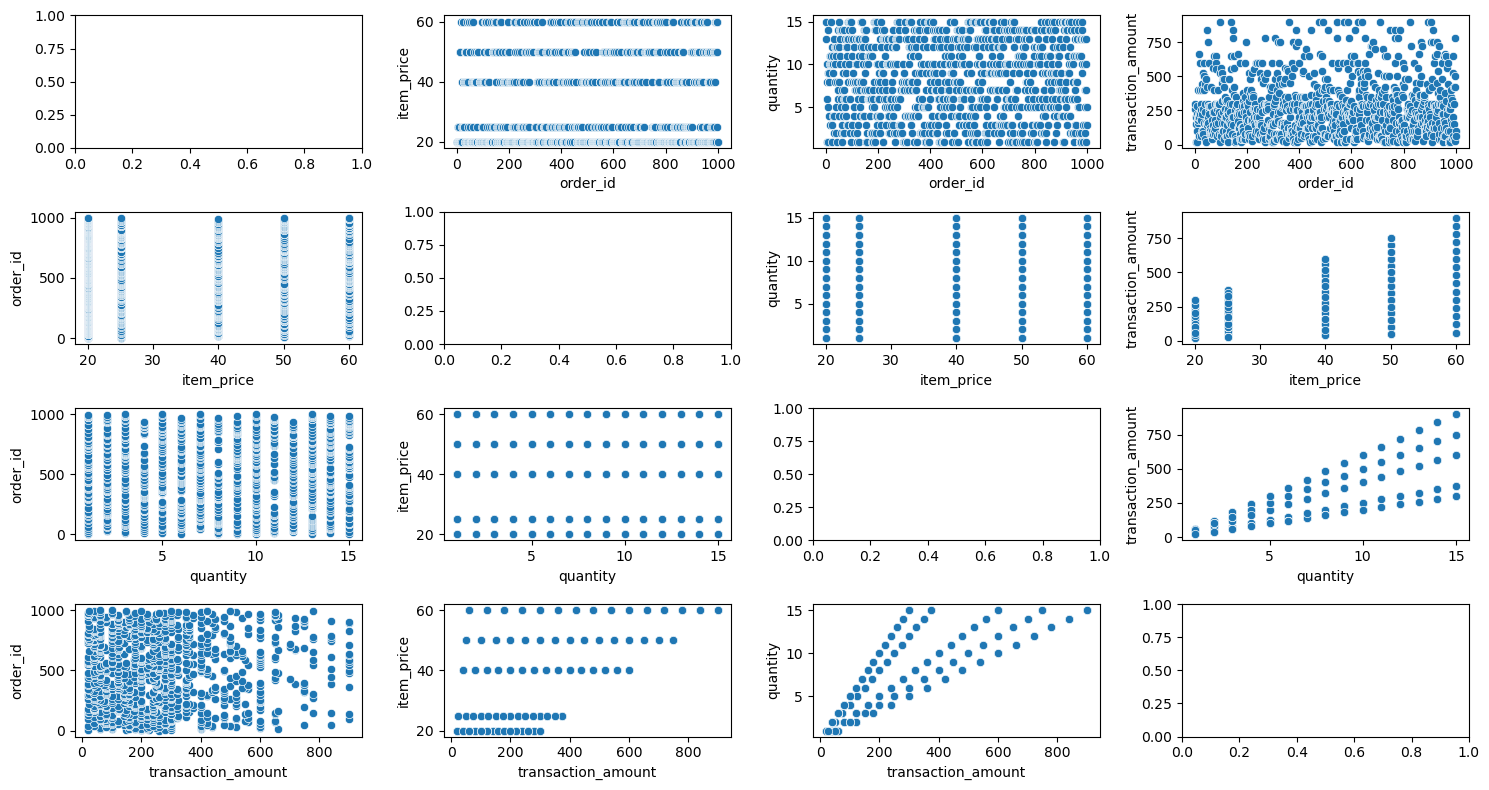

In [96]:
t=1
for i in num:
    for j in num:
        plt.subplot(4,4,t)
        if i !=j:
            sns.scatterplot(x=df[i],y=df[j])
        t+=1
plt.tight_layout()
plt.show()

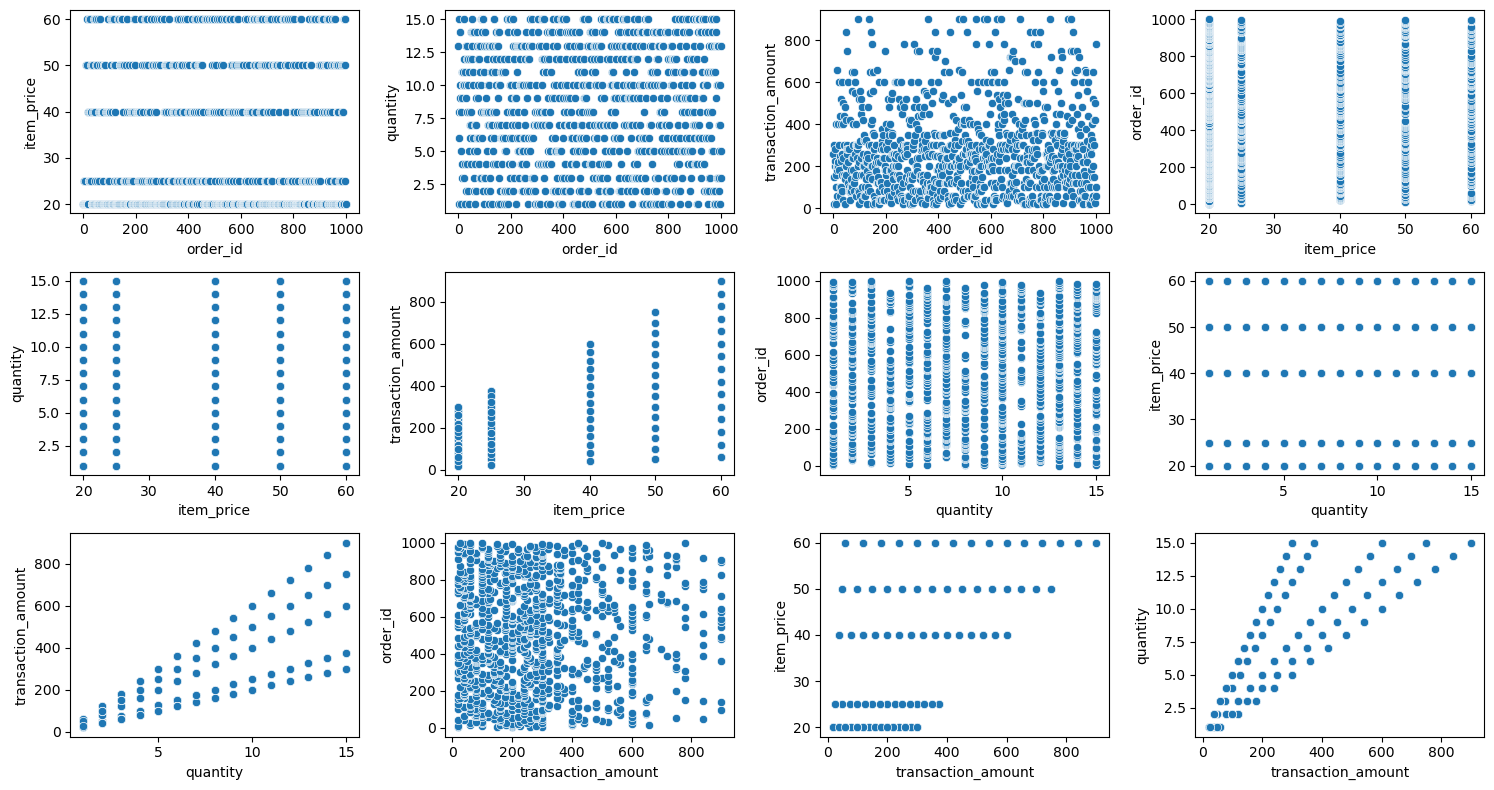

In [97]:
t=1
for i in num:
    for j in num:
        if i !=j:
            plt.subplot(3,4,t)
            sns.scatterplot(x=df[i],y=df[j])
            t+=1
plt.tight_layout()
plt.show()

### INFERENCE:
* There is an increasing trend in item_price vs transaction_amount.
* There is no inference that can be inferred from order_id vs item_price.

## num vs cat

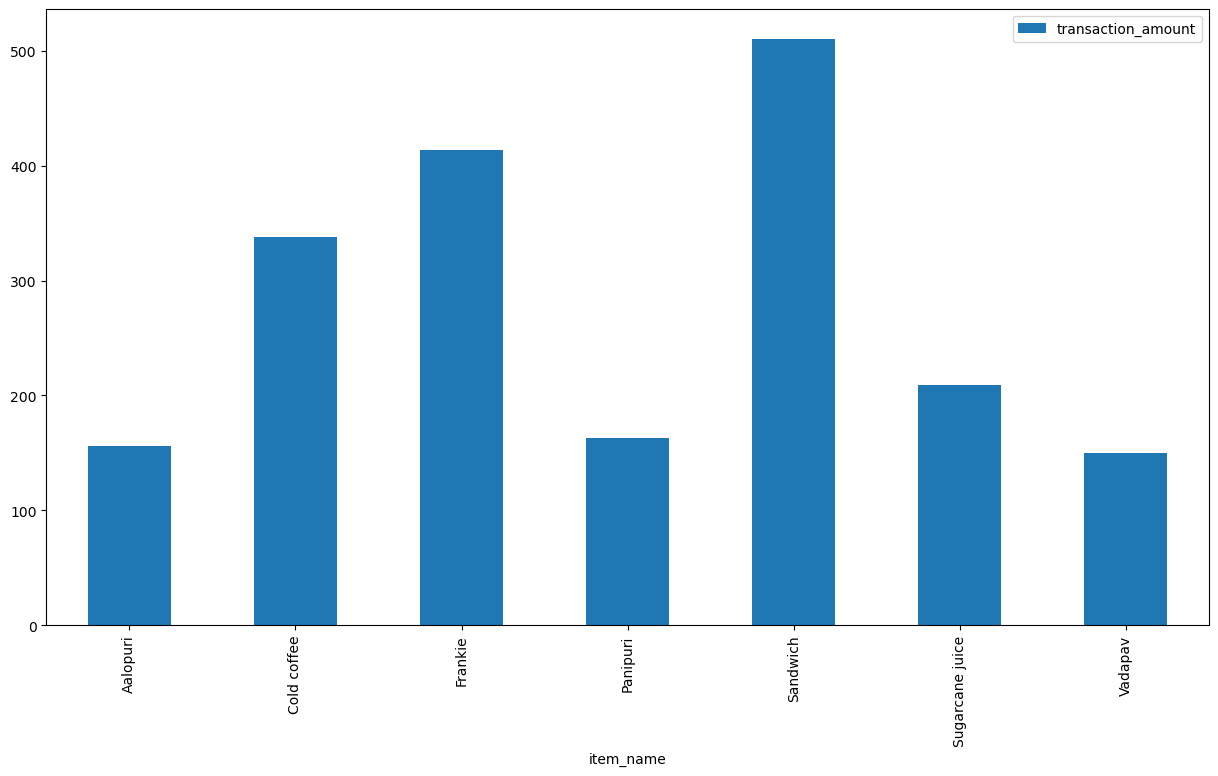

In [100]:
df.groupby(by='item_name')[['transaction_amount']].mean().plot(kind='bar')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

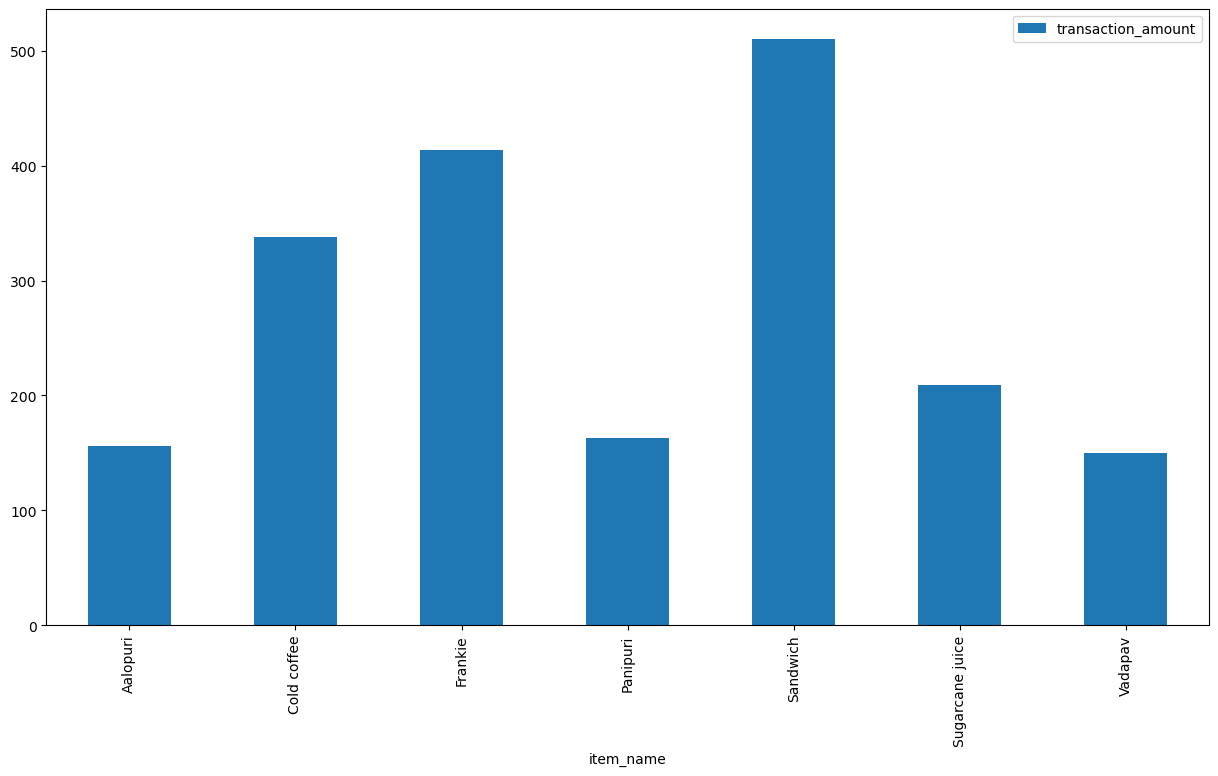

In [101]:
df.pivot_table(index='item_name',values='transaction_amount',aggfunc='mean').plot(kind= 'bar')
plt.show

Inference:
* Average transaction amont of Sandwich is the highest in this dataset.
* Average transaction amont of Vadapav is the least in this dataset.

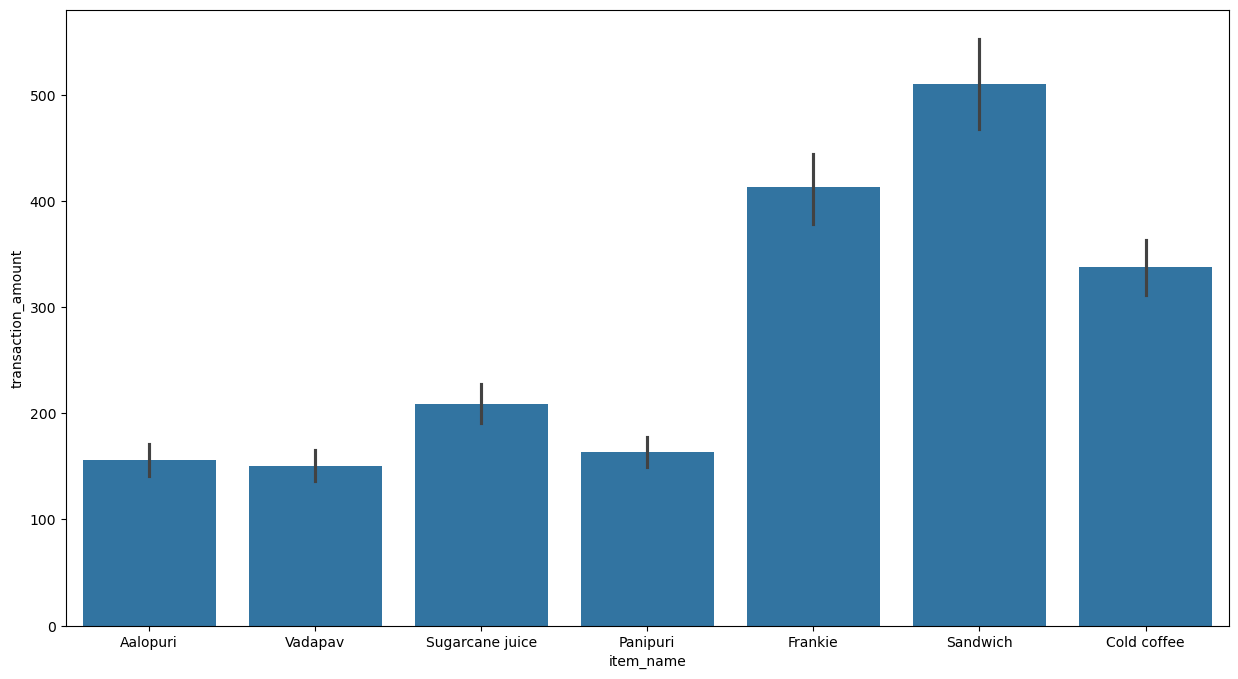

In [103]:
sns.barplot(x=df['item_name'],y= df['transaction_amount'])
plt.show()

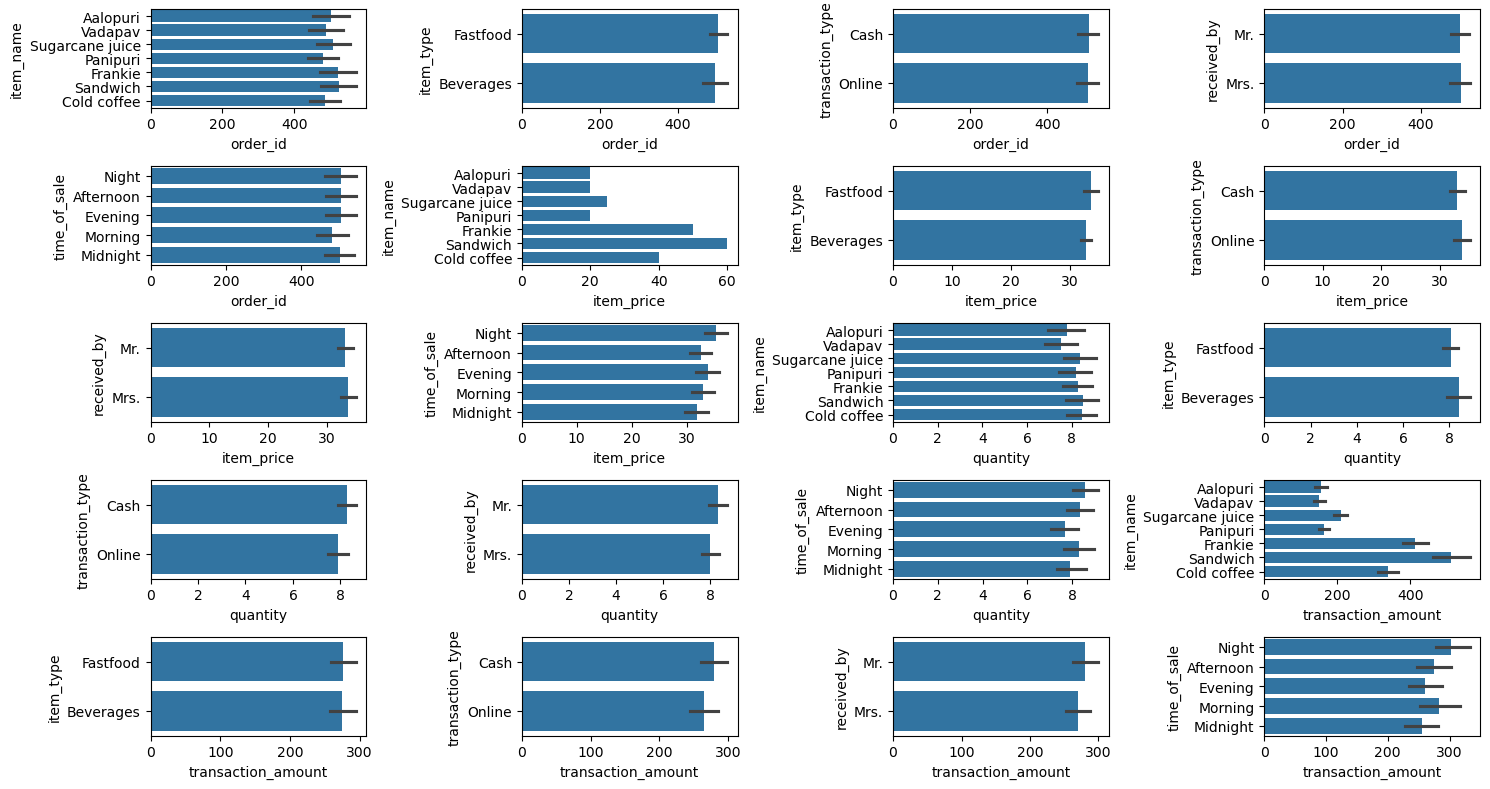

In [104]:
t=1
for i in num:
    for j in cat:
        if j!='date':
            plt.subplot(5,4,t)
            sns.barplot(x=df[i],y=df[j])
            t+=1
plt.tight_layout()
plt.show()

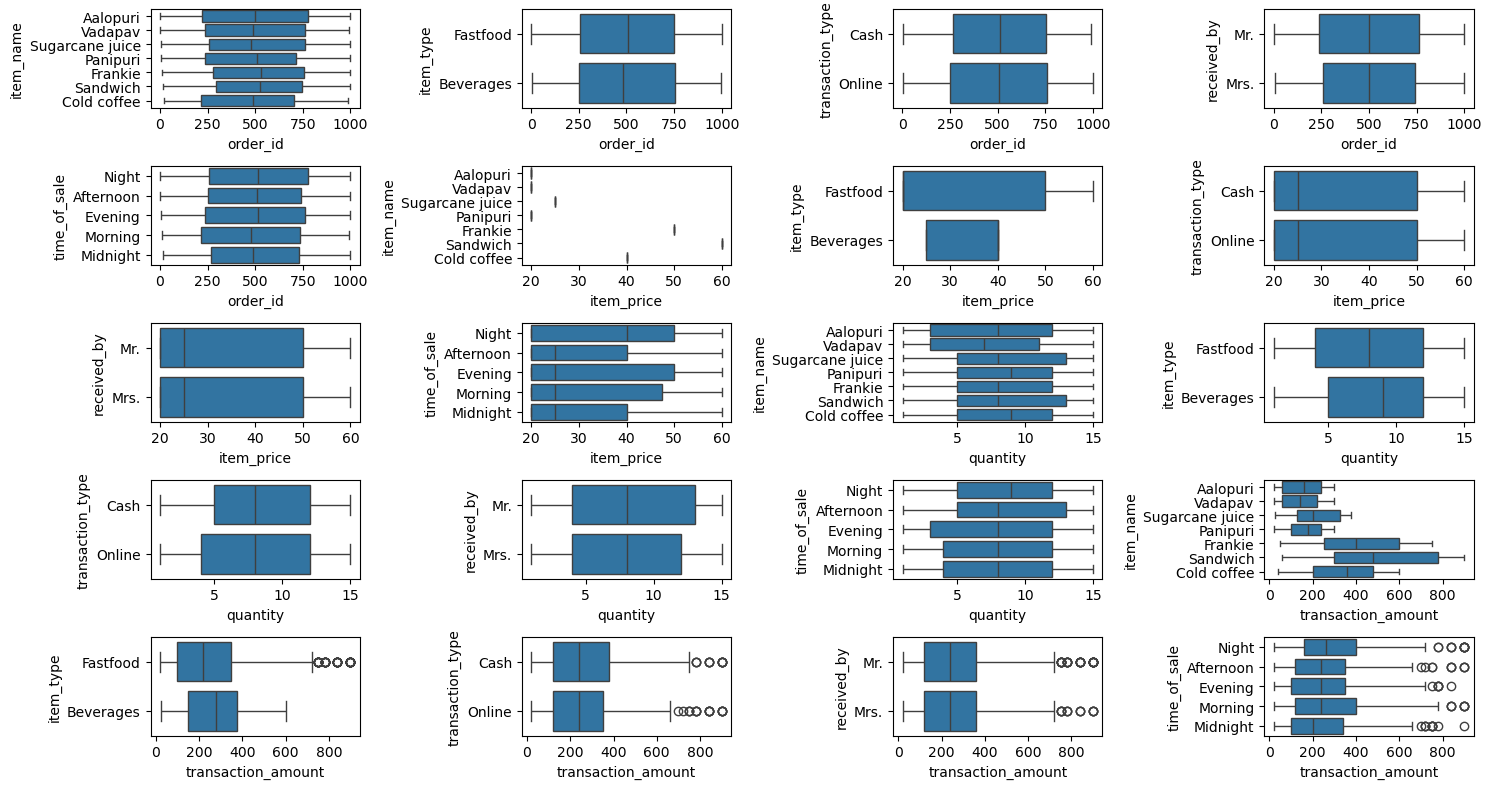

In [105]:
t=1
for i in num:
    for j in cat:
        if j!='date':
            plt.subplot(5,4,t)
            sns.boxplot(x=df[i],y=df[j])
            t+=1
plt.tight_layout()
plt.show()

## cat vs cat

In [107]:
cat

['date',
 'item_name',
 'item_type',
 'transaction_type',
 'received_by',
 'time_of_sale']

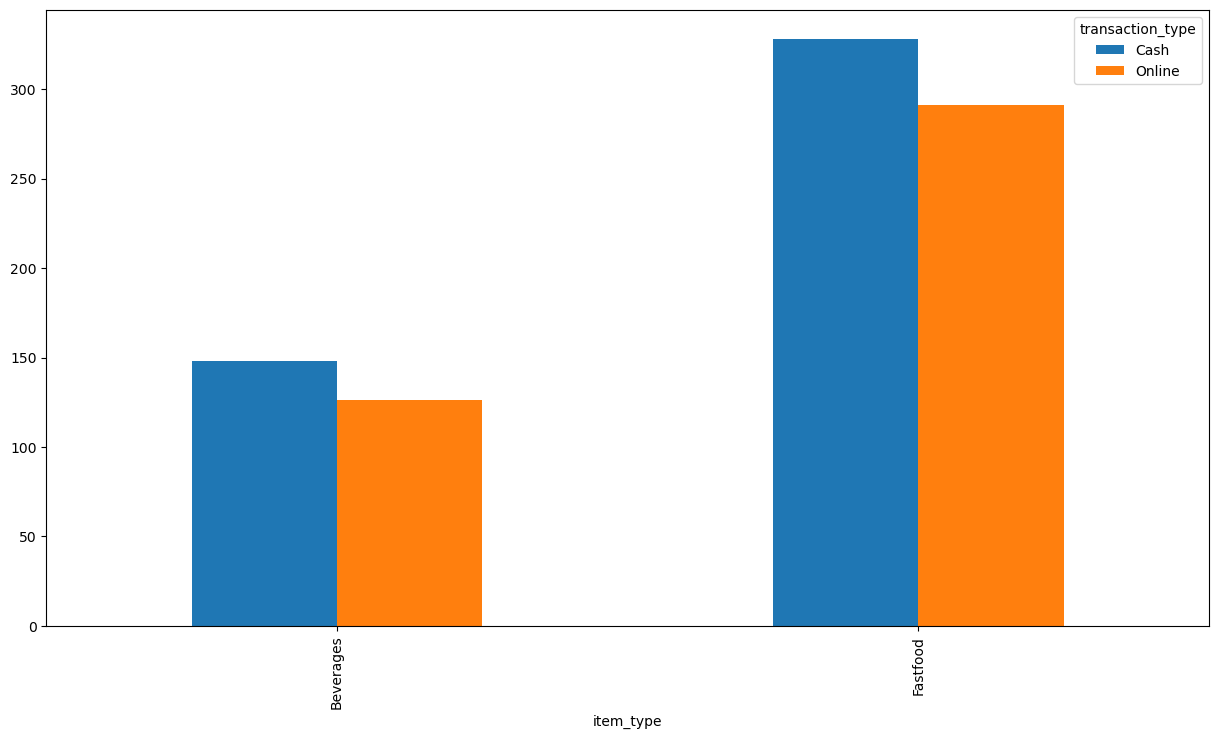

In [108]:
pd.crosstab(df['item_type'],df['transaction_type']).plot(kind='bar')
plt.show()

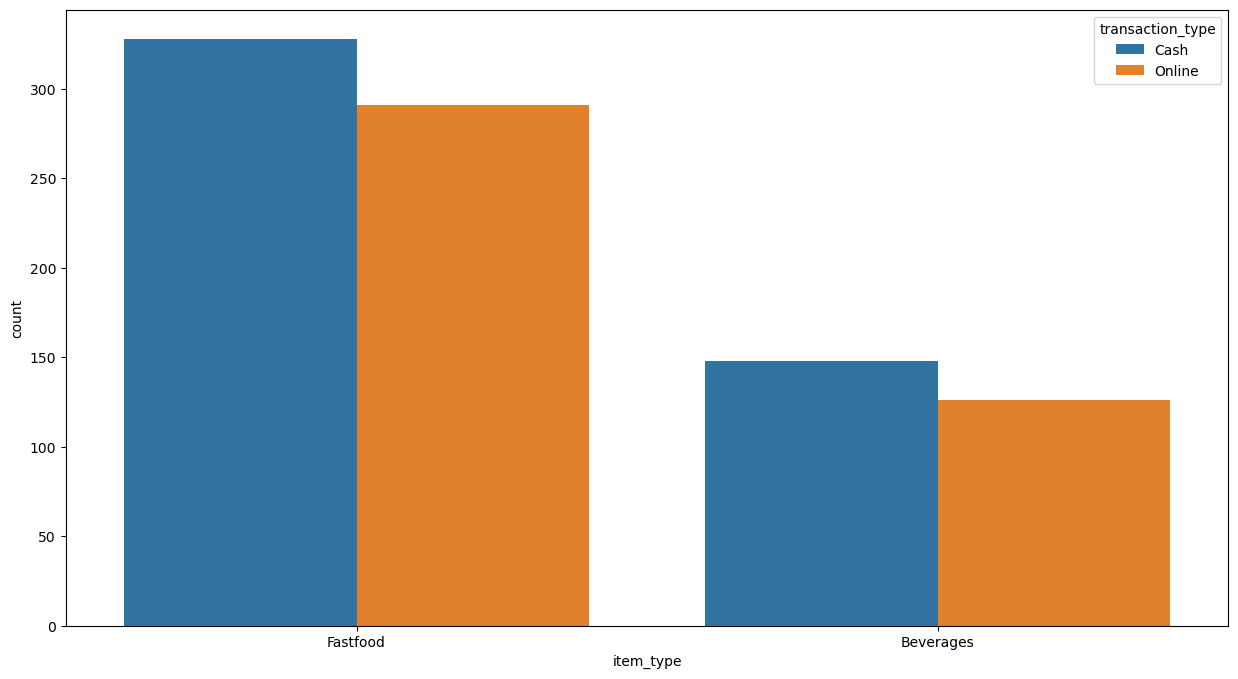

In [109]:
sns.countplot(x=df['item_type'],hue=df['transaction_type'])
plt.show()

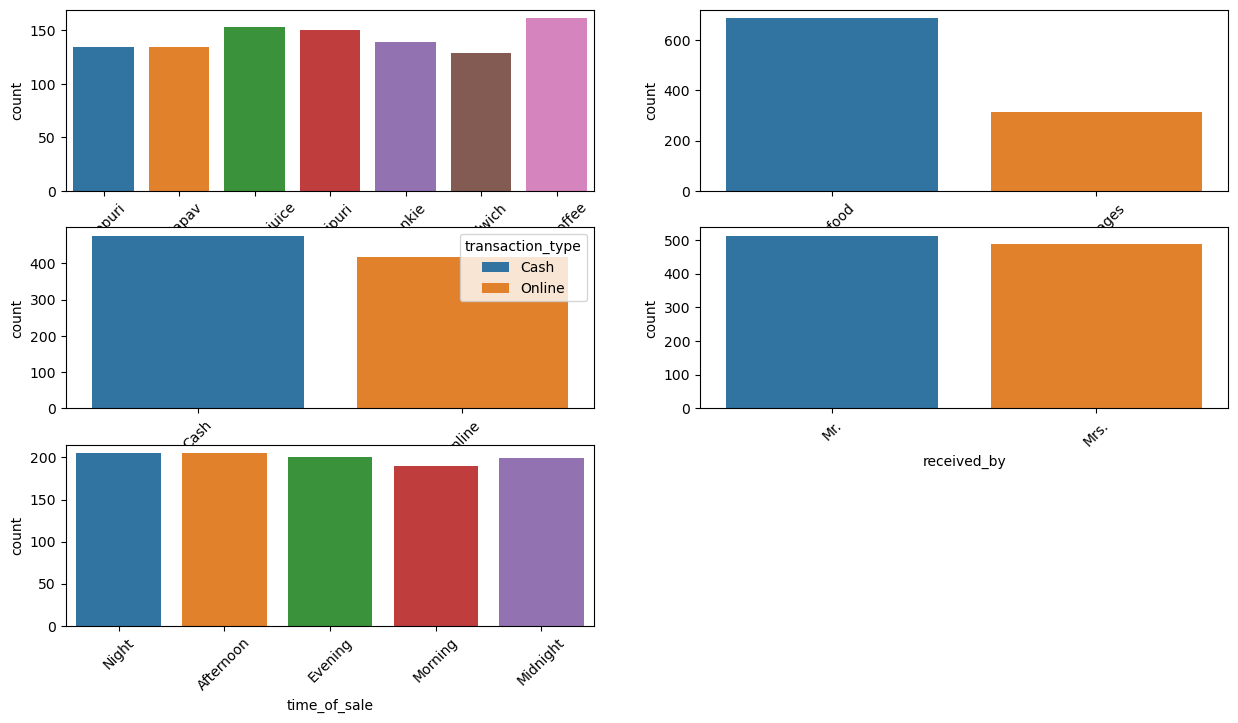

In [110]:
t=1
for i in cat:
    if  i != 'date':
        plt.subplot(3,2,t)
        sns.countplot(x=df[i],hue= df[i])
        plt.xticks(rotation= 45)
        t+=1
plt.show()
            

# Multivariate analysis

## num vs num vs cat

#### Finding the trend of 2 numerical variable with respect to 1 category
#### Hue -- Categorical column

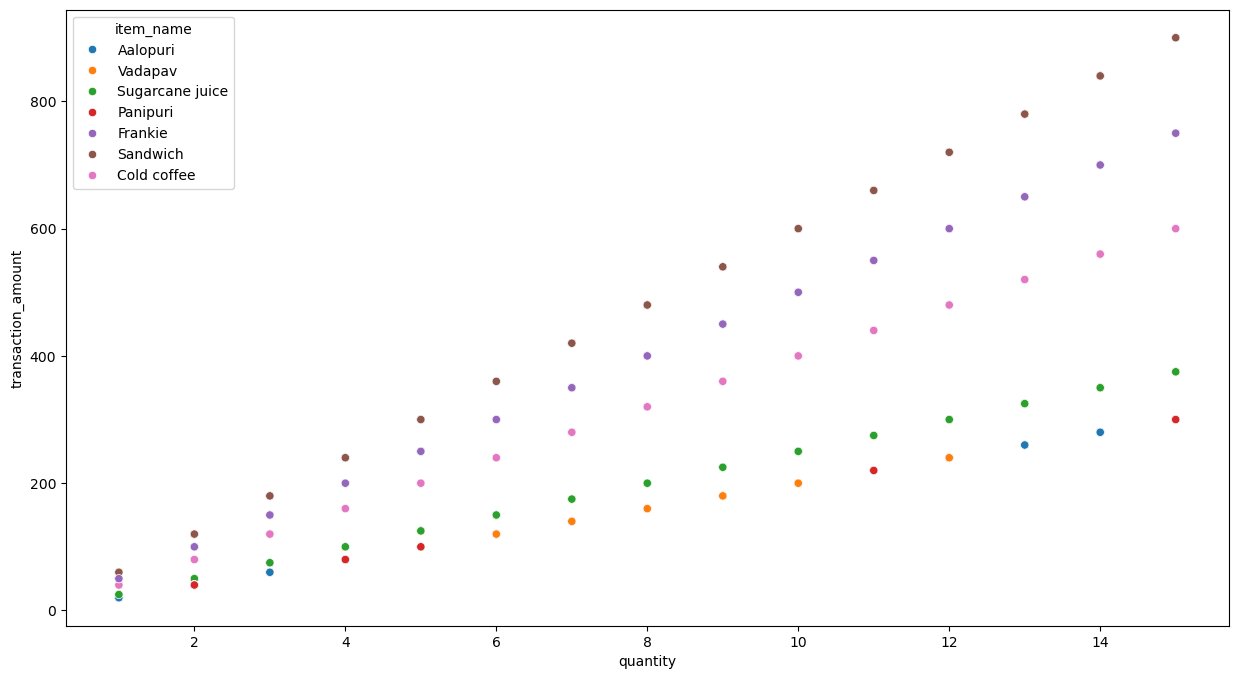

In [114]:
sns.scatterplot(x=df['quantity'],y=df['transaction_amount'], hue= df['item_name'])
plt.show()

## num vs cat vs cat

#### Box Plot

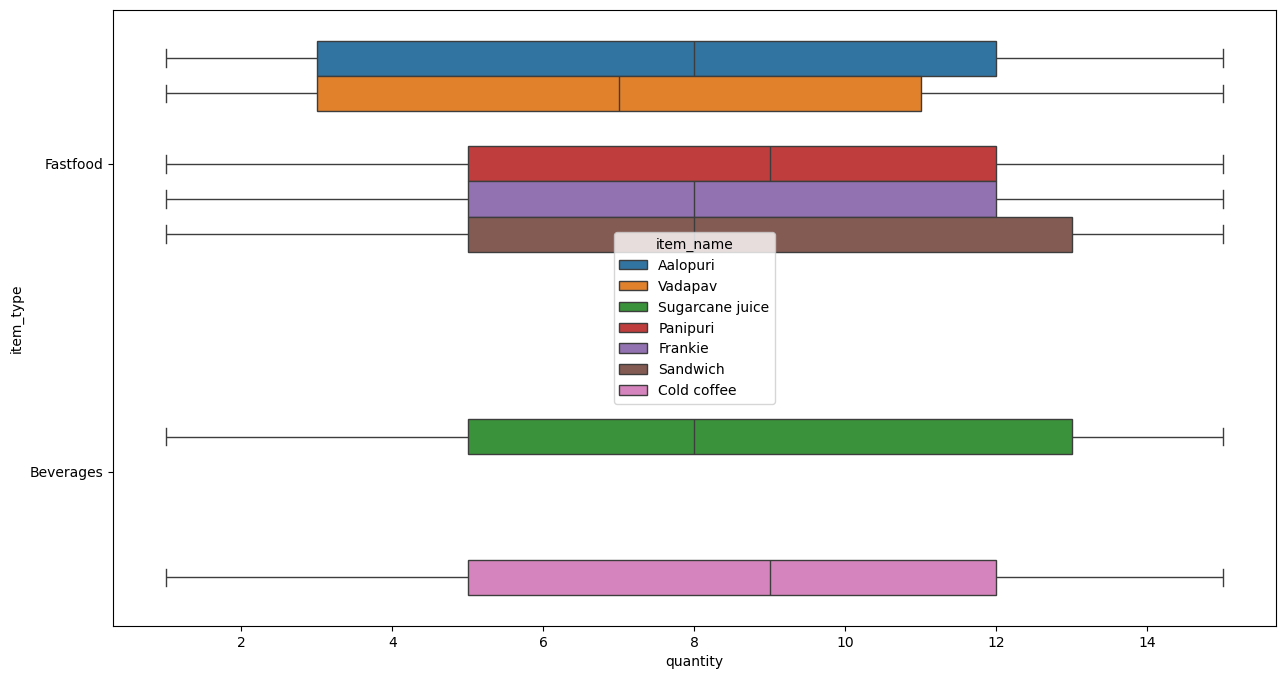

In [117]:
sns.boxplot(x= df['quantity'], y=df['item_type'], hue= df['item_name'])
plt.show()

#### Bar plot

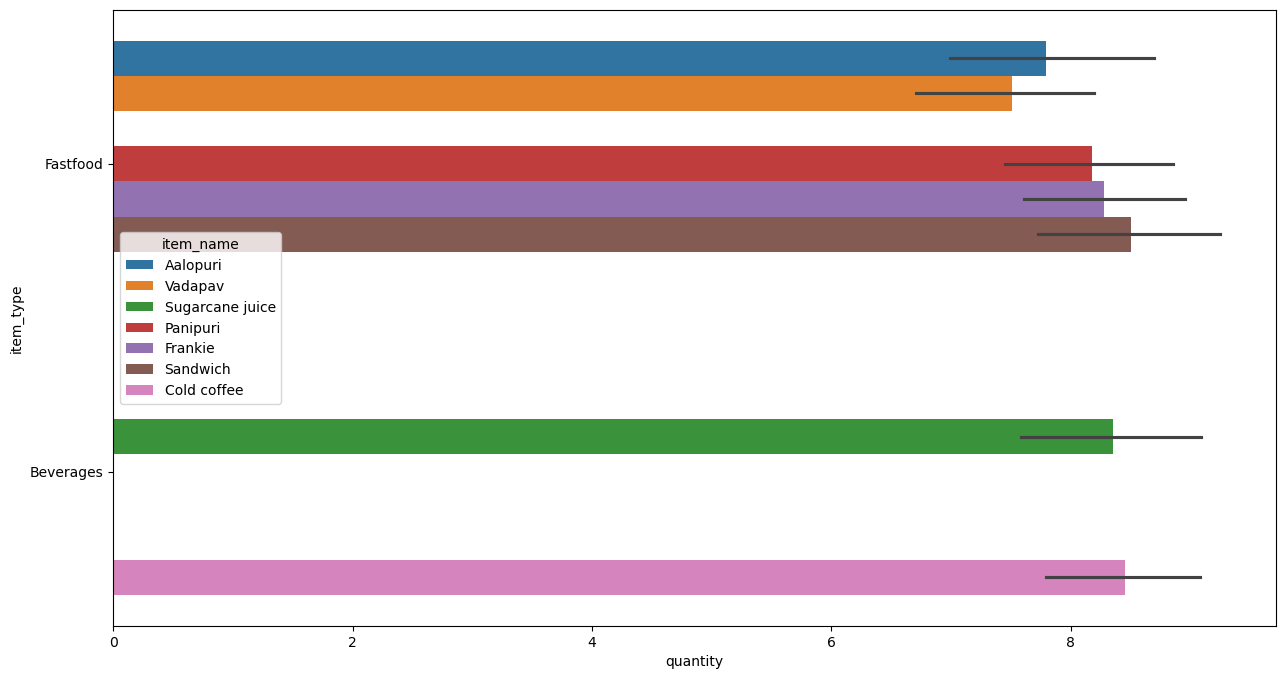

In [119]:
sns.barplot(x= df['quantity'], y= df['item_type'], hue= df['item_name'])
plt.show()

#### Heat map

In [121]:
df[num].corr()

,order_id,item_price,quantity,transaction_amount
order_id,1.000000,0.037028,0.010345,0.043970
item_price,0.037028,1.000000,0.050361,0.637238
quantity,0.010345,0.050361,1.000000,0.731806
transaction_amount,0.043970,0.637238,0.731806,1.000000


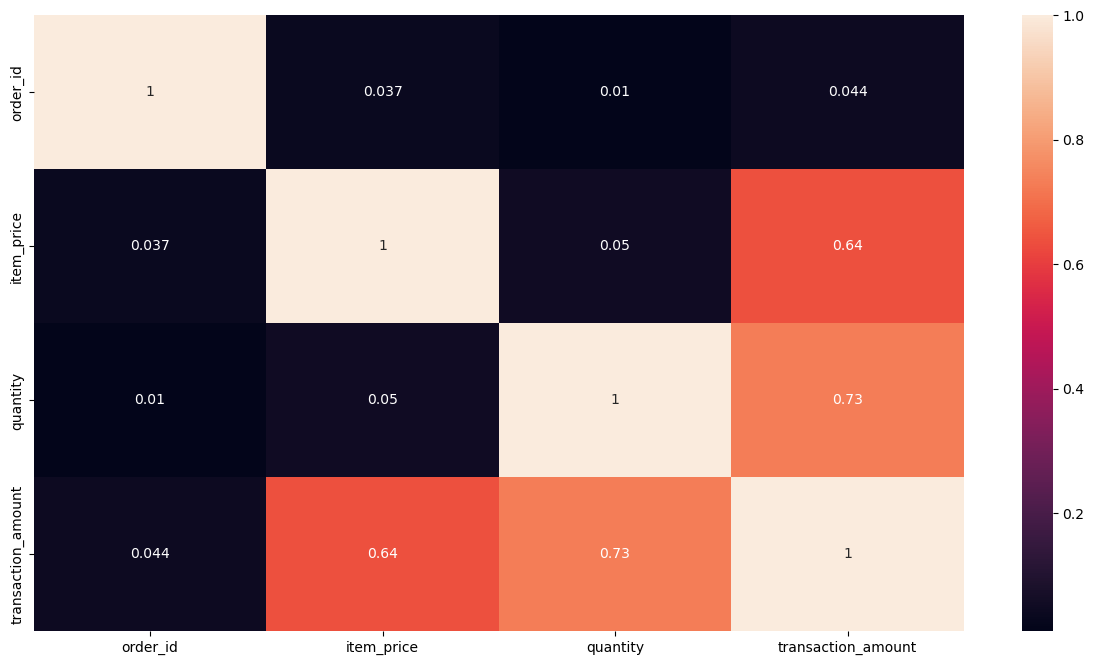

In [122]:
sns.heatmap(df[num].corr(), annot= True)
plt.show()

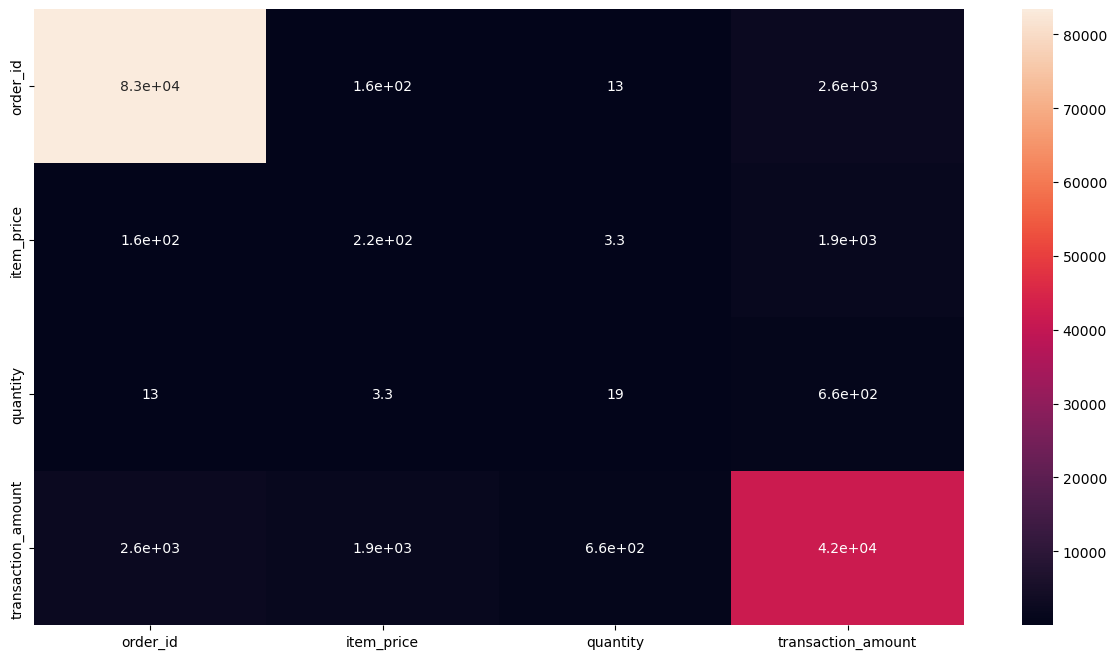

In [123]:
sns.heatmap(df[num].cov(), annot= True)
plt.show()

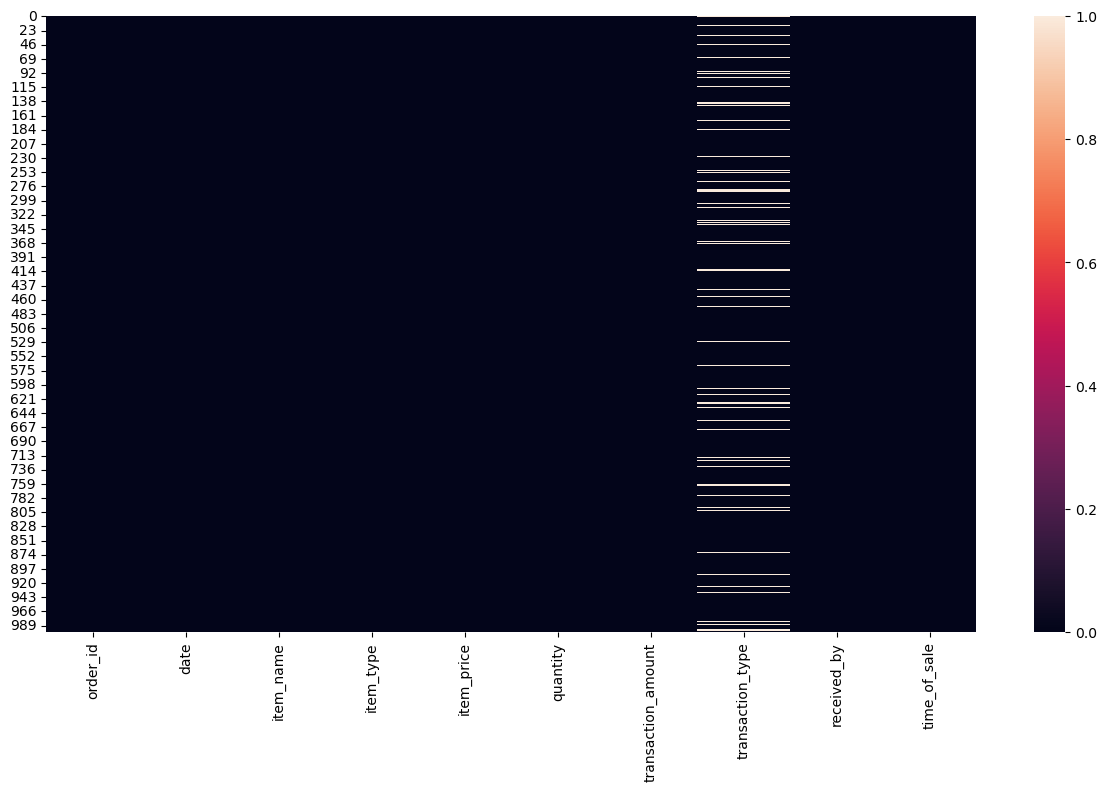

In [203]:
# To get null values
sns.heatmap(df.isnull())
plt.show()

#### Pairplot

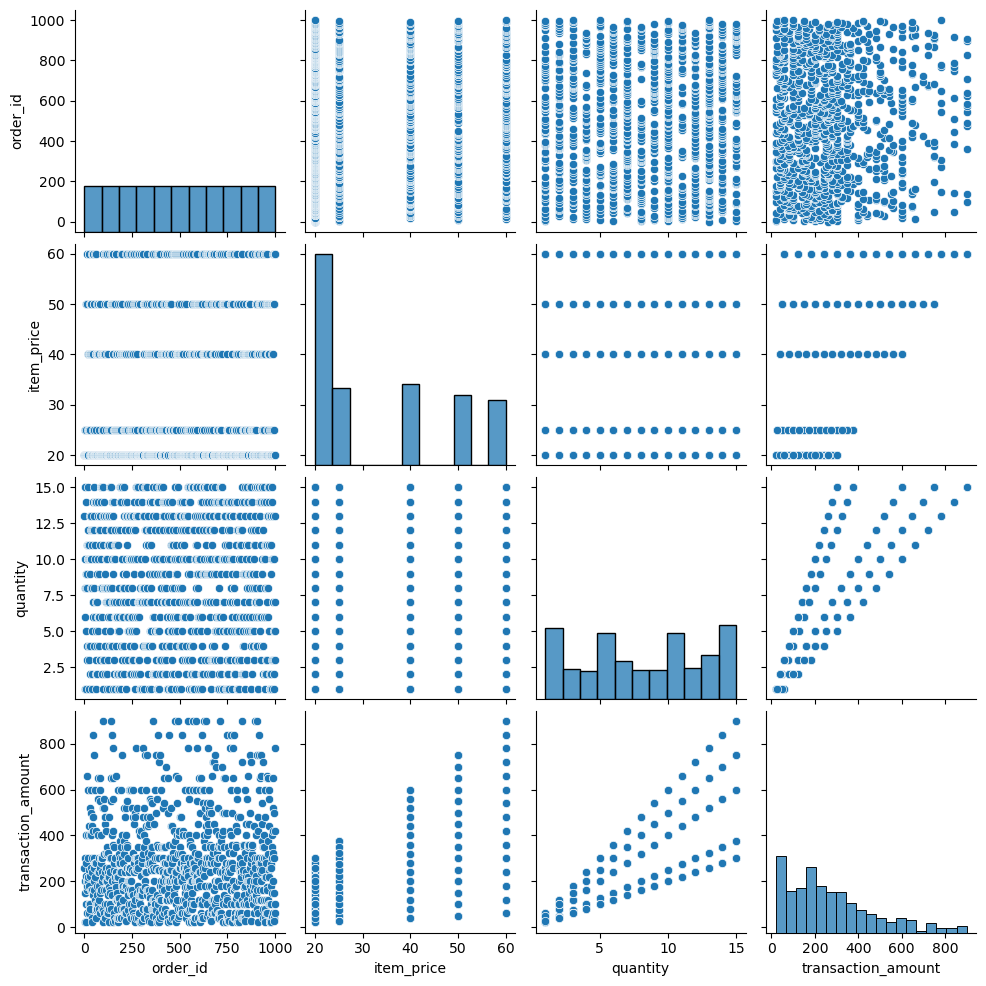

In [206]:
sns.pairplot(df)
plt.show()

#### Violin plot

#### To see outliers like boxplot, used mainly for univariate

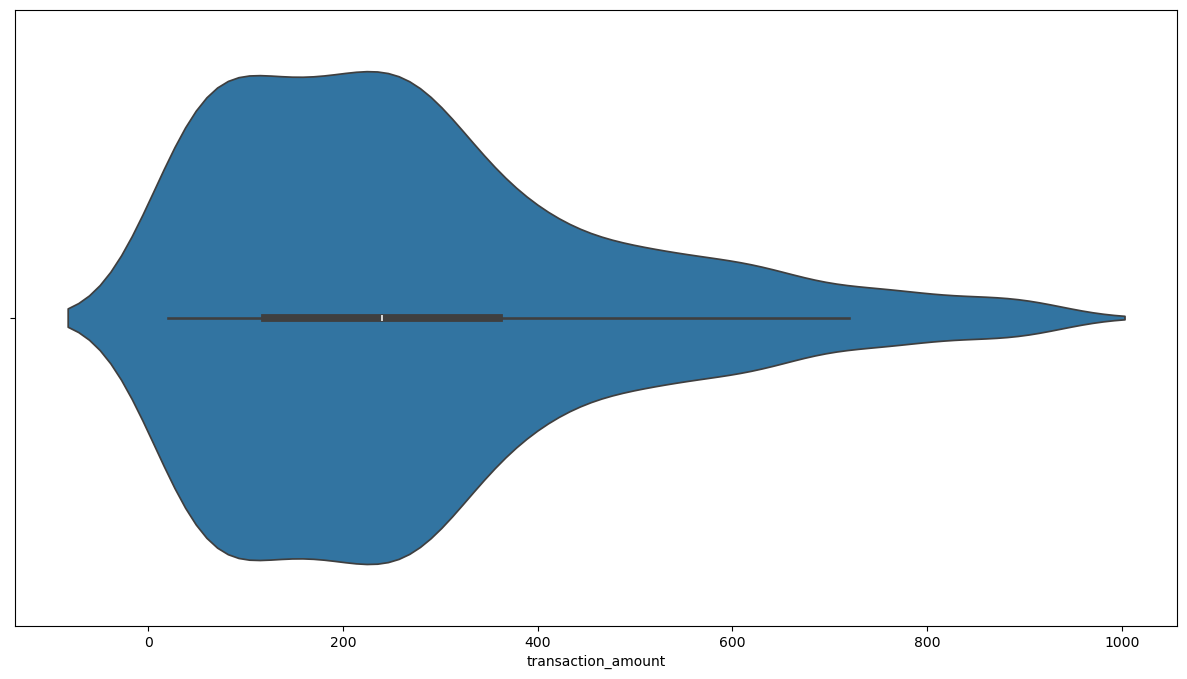

In [210]:
sns.violinplot(x=df['transaction_amount'])
plt.show()

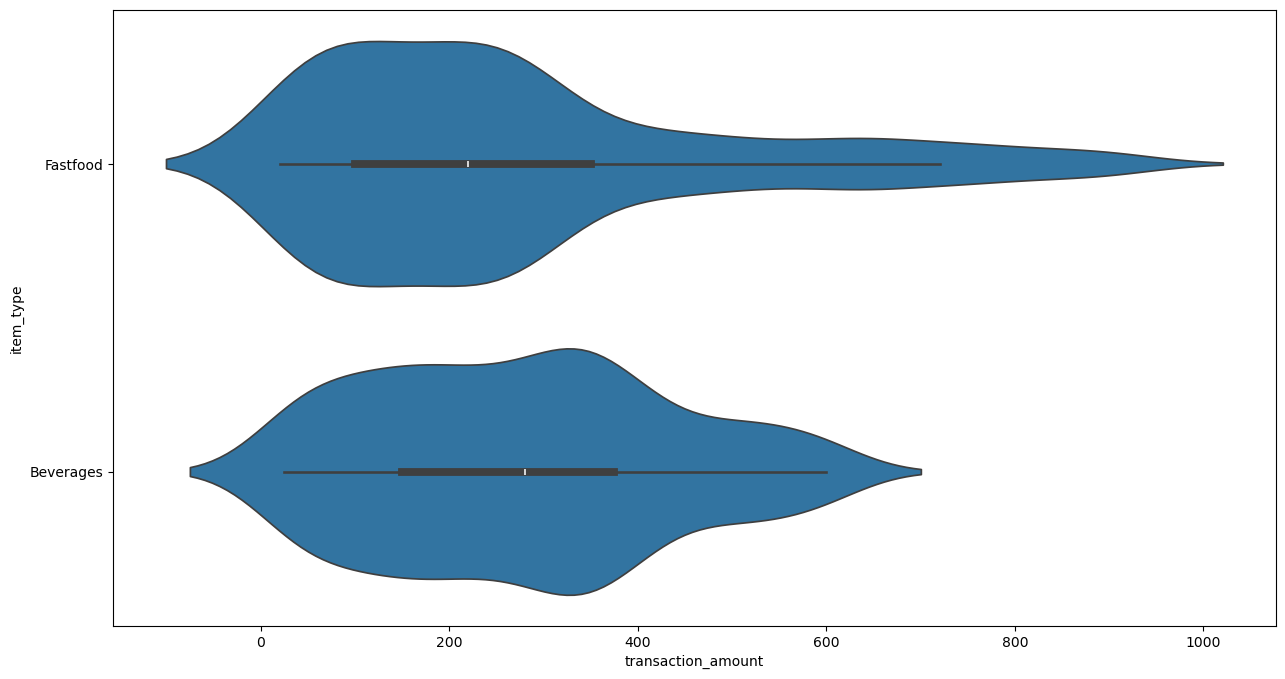

In [212]:
sns.violinplot(x= df['transaction_amount'], y= df['item_type'])
plt.show()

#### Swarm plot

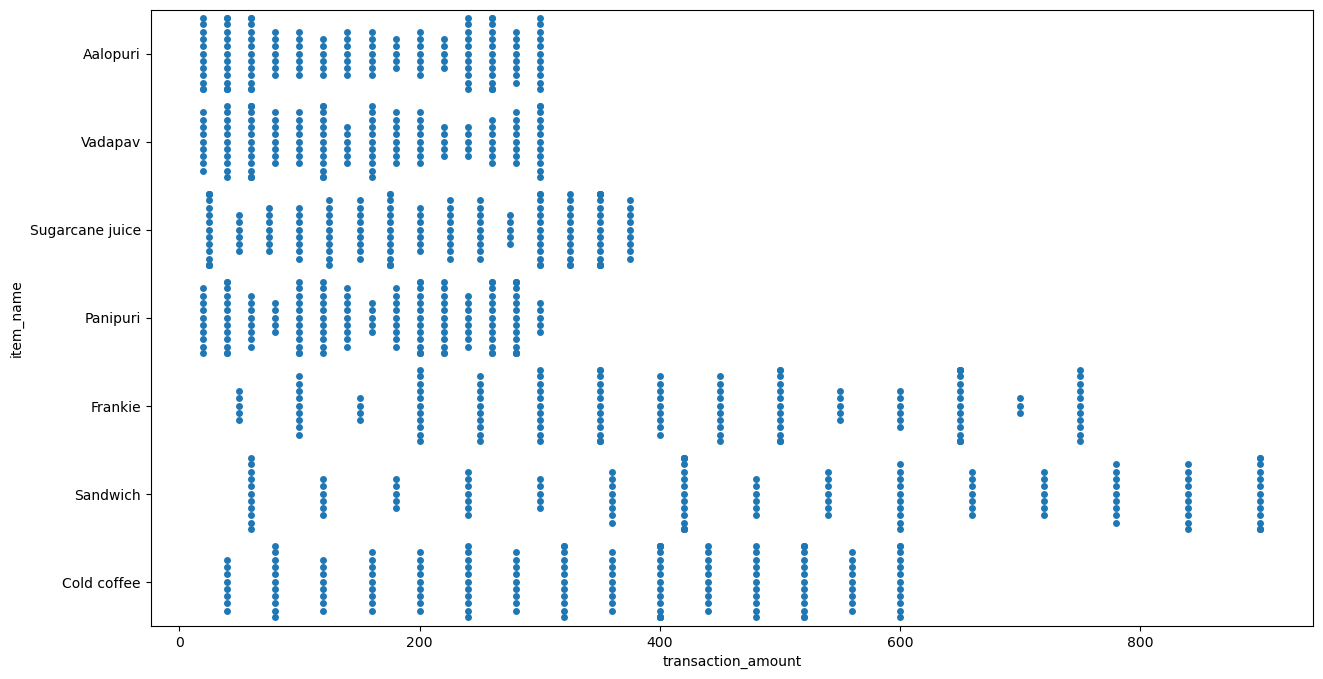

In [219]:
sns.swarmplot(x=df['transaction_amount'],y=df['item_name'])
plt.show()

#### Line plot

In [222]:
x=np.linspace(1,20,100)
y=np.exp(x)

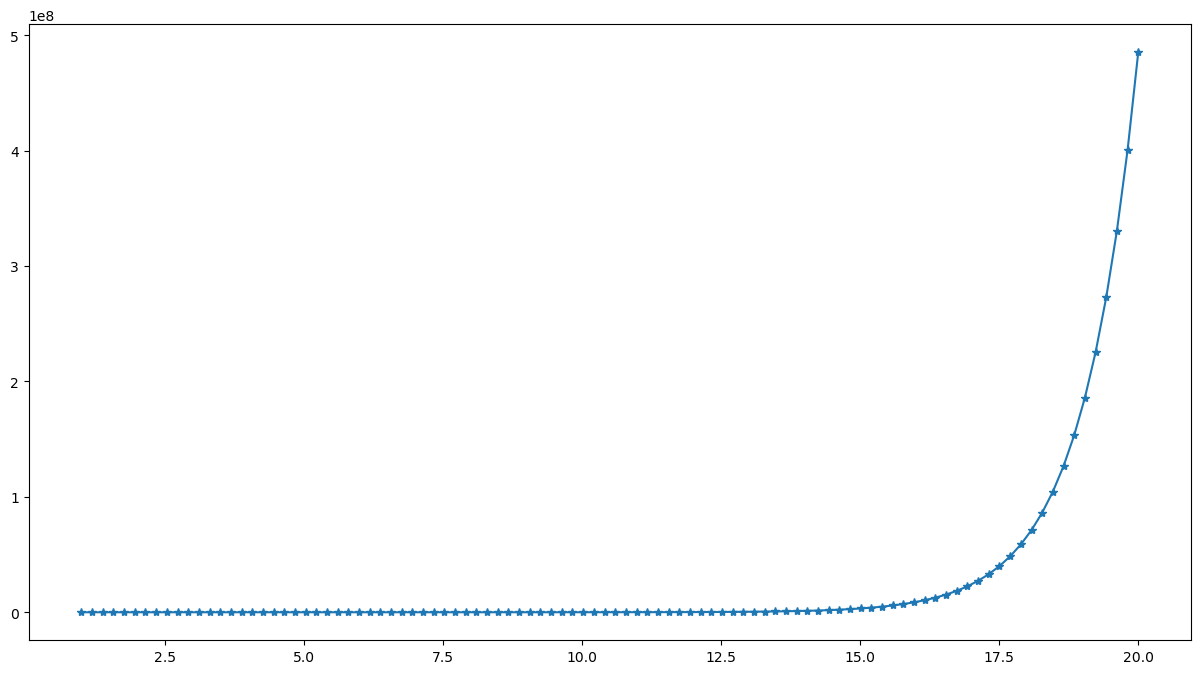

In [226]:
plt.plot(x,y,marker='*')
plt.show()

#### Regression plot

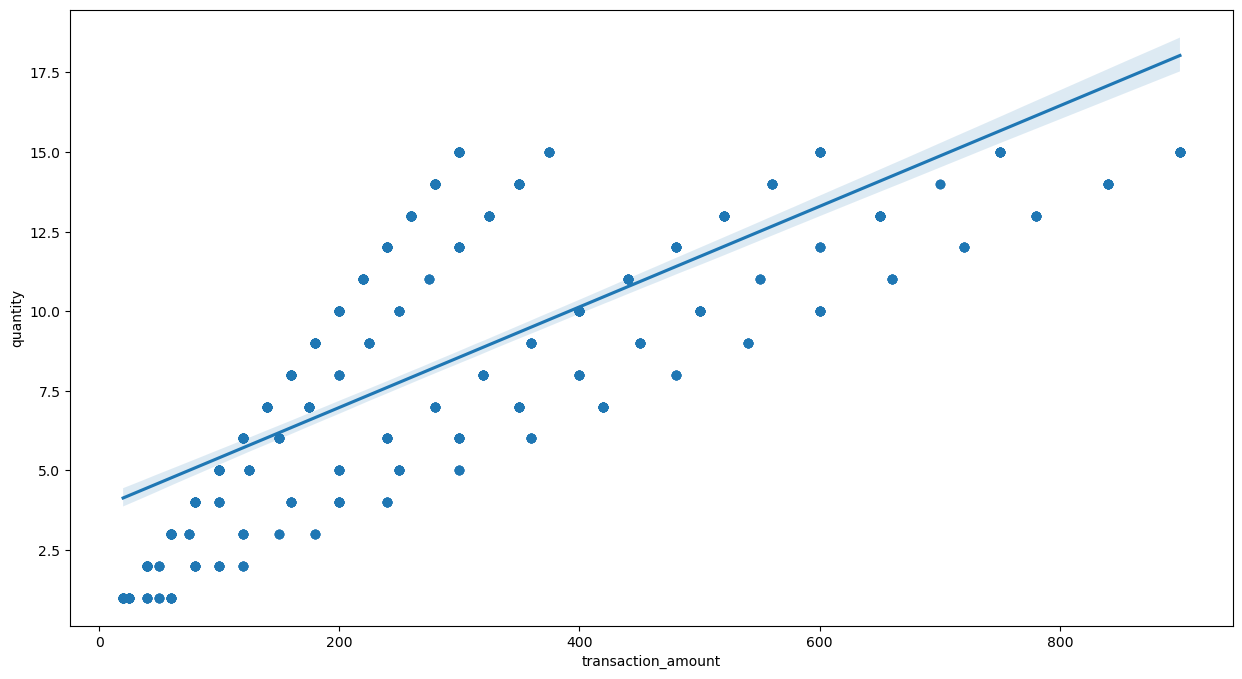

In [229]:
sns.regplot(x=df['transaction_amount'],y=df['quantity'])
plt.show()